# Problem Statement
Output variable -> y \
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")

# Attribute information For bank dataset

   Input variables:
   ## bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   ## related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
   ## other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

   ## Missing Attribute Values: None


# Part 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df = pd.read_csv('bank-full.csv',delimiter=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [2]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
df.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Column Names
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [6]:
# Discrete feature
discrete_feature = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

### Now let’s see the class distribution of the target feature ‘y’ in the dataset.

In [7]:
#Distribution of the Target Feature: 'y' - has the client subscribed a term deposit? (binary: 'yes', 'no')
df['y'].value_counts(normalize='True') #normalise='True' returns % according to frequency

y
no     0.883015
yes    0.116985
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Target Distribution')

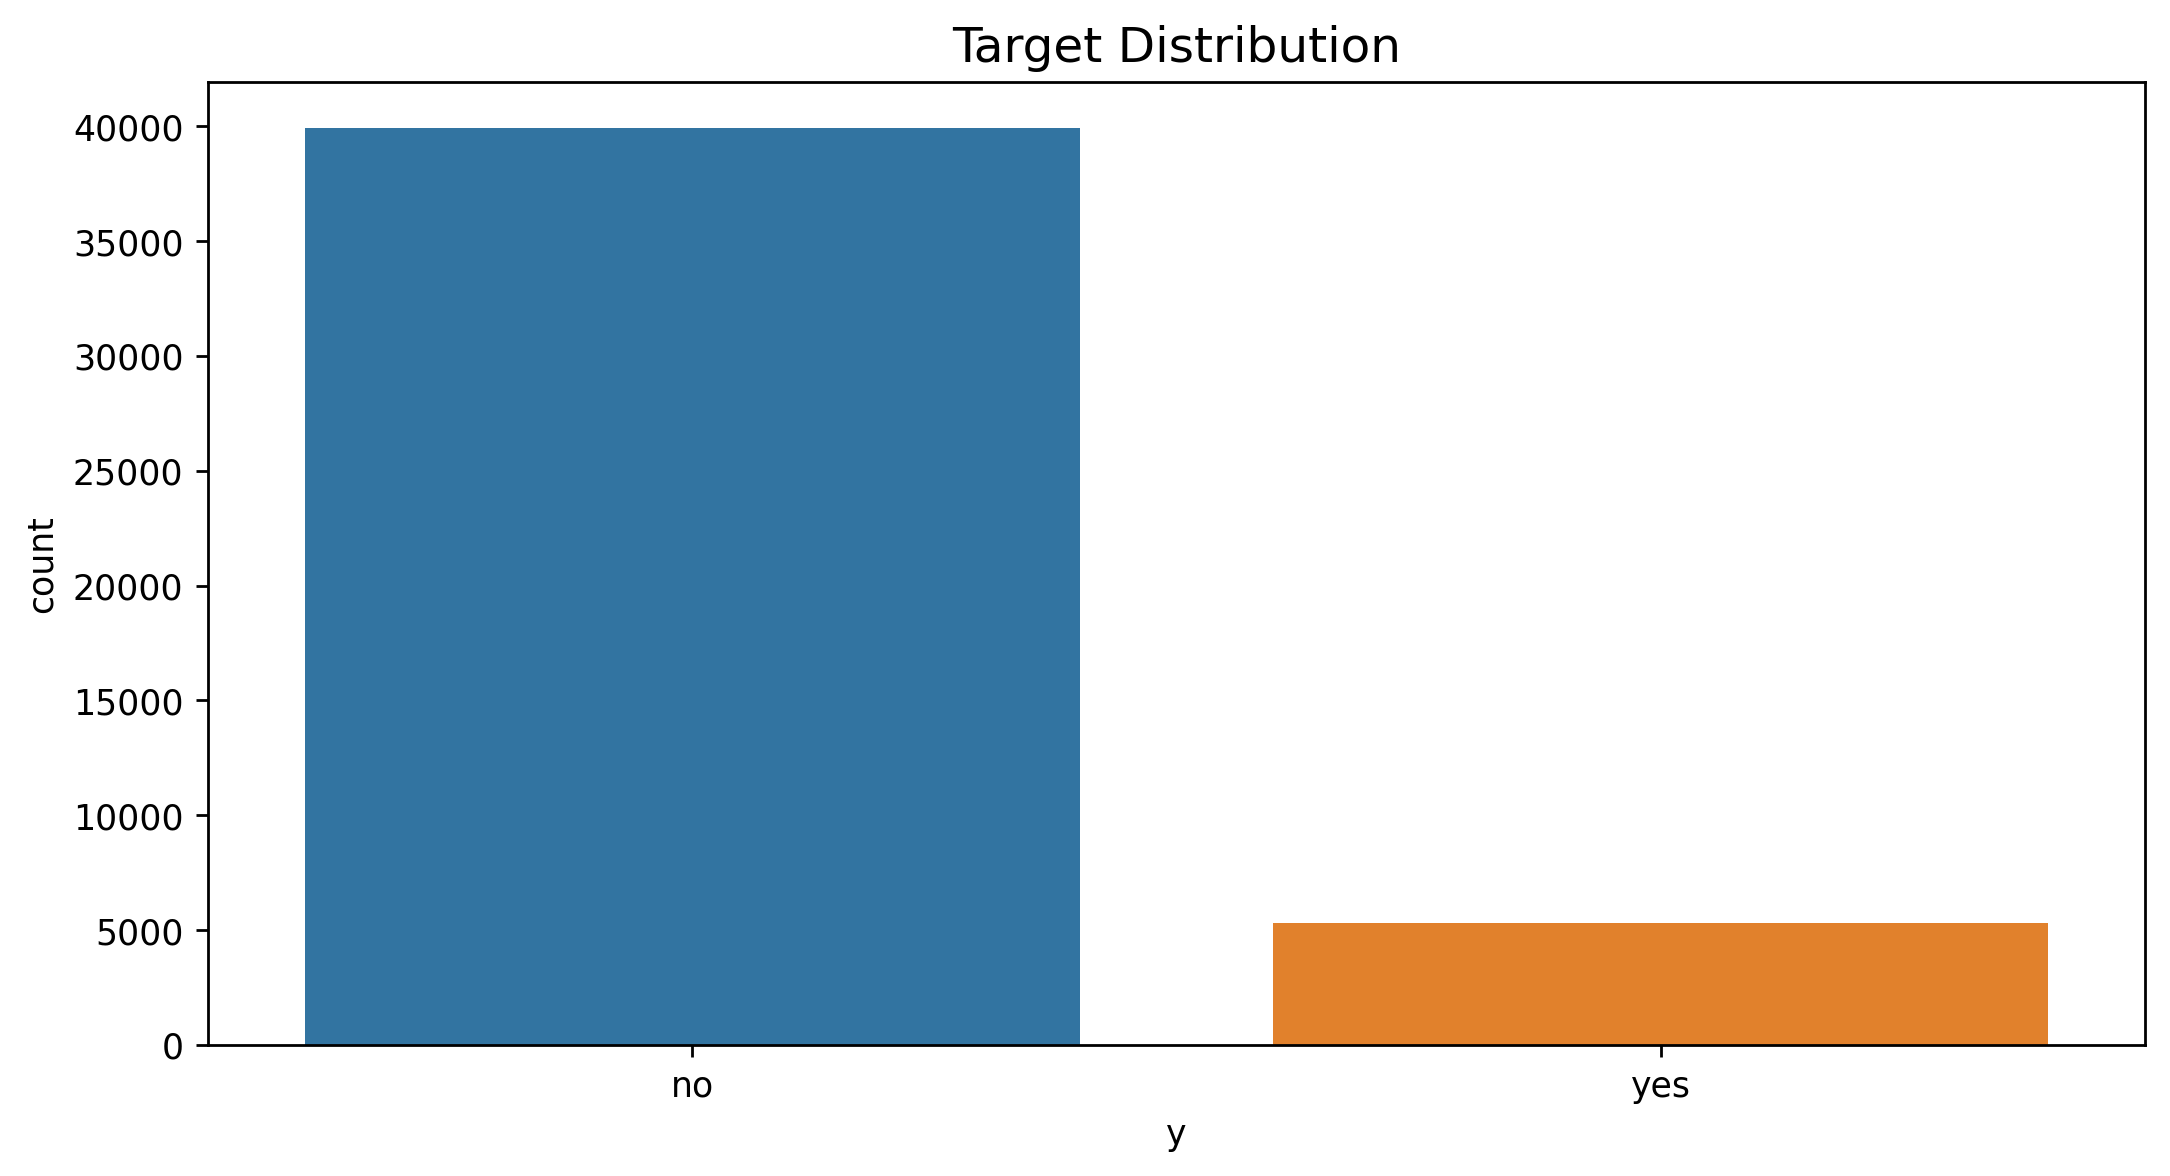

In [8]:
sns.countplot(x ='y', data = df)
plt.title("Target Distribution", fontsize=14)

#### Data is highly imbalanced. the number of people saying no to term deposit is more than the people saying yes.

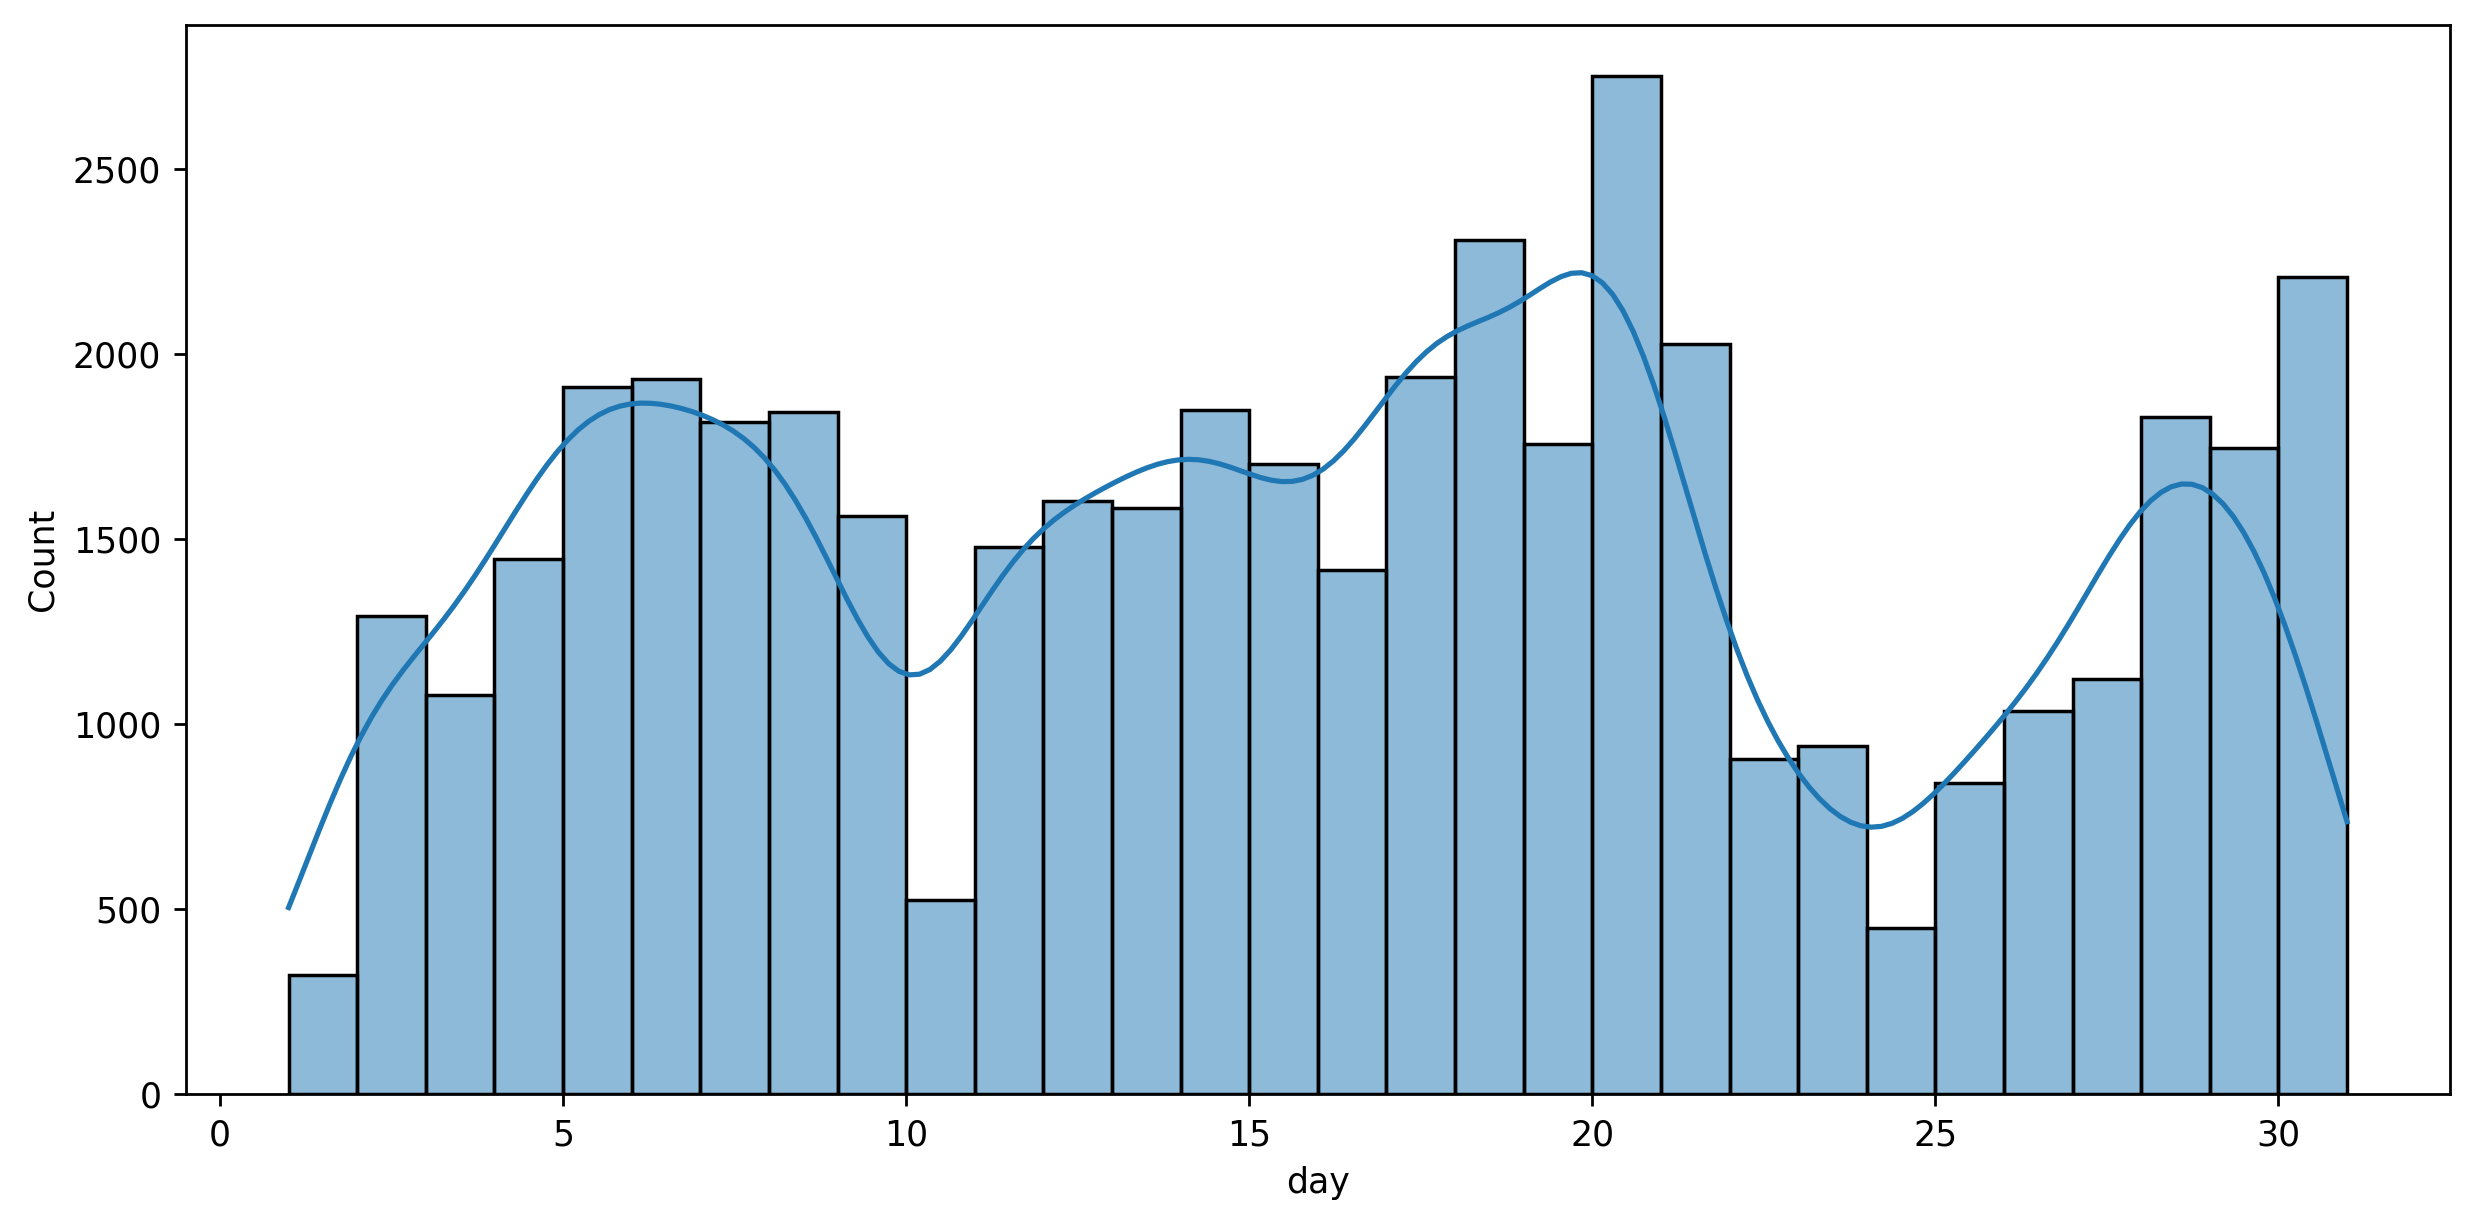

In [9]:
# day : last contact day of the month
sns.histplot(data = df['day'], kde = True, bins=30)
plt.tight_layout()
plt.show()

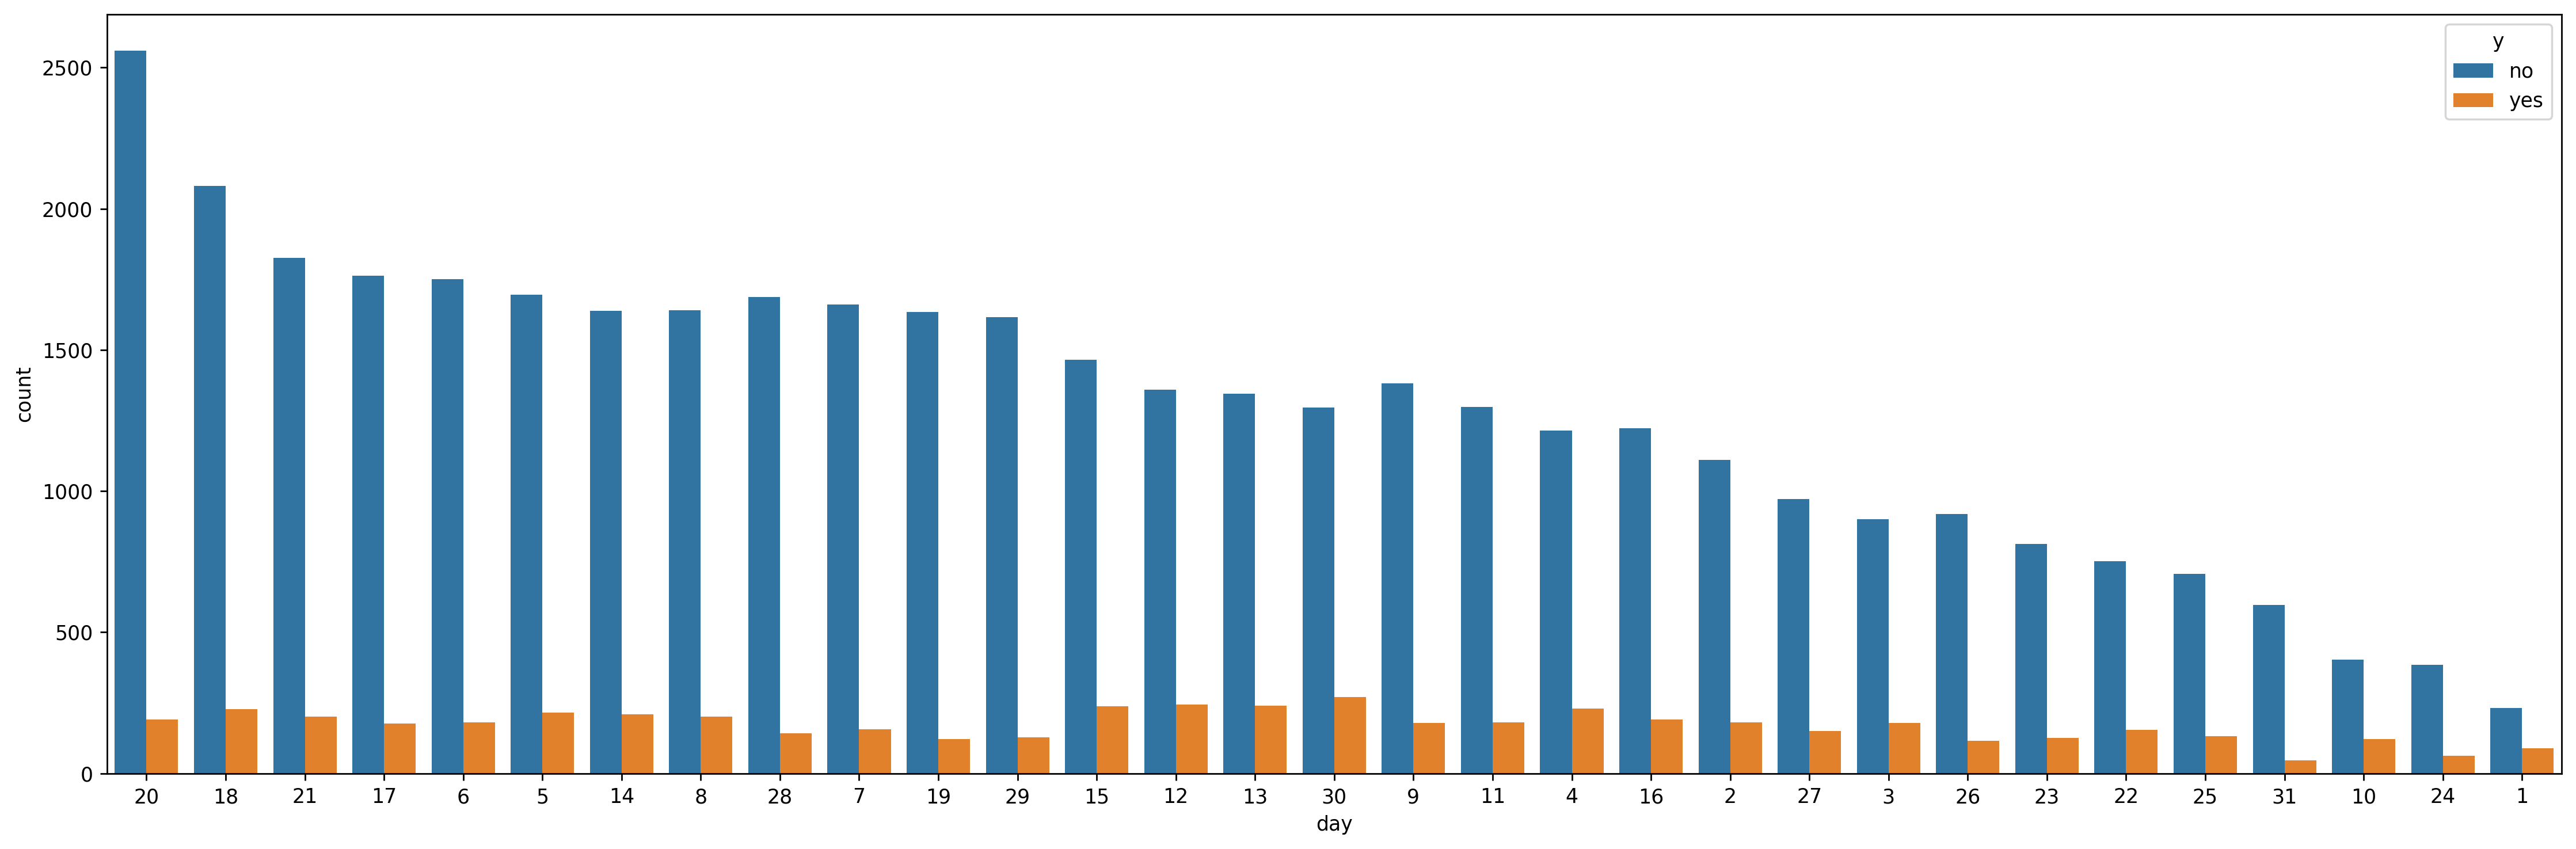

In [10]:
# day : last contact day of the month vs Target
plt.figure(figsize=(18,6))
sns.countplot(x ='day', hue='y',data = df,order = df['day'].value_counts().index) #individual bars sorted acc to frequency and then plotted
plt.tight_layout()
plt.show()

#### We can see that all the days have more or less similar distribution for both the classes. Thus we won’t be using it in predicting the target variable. We will dropped this feature before making our models below.

### Knowing the categorical variablesb

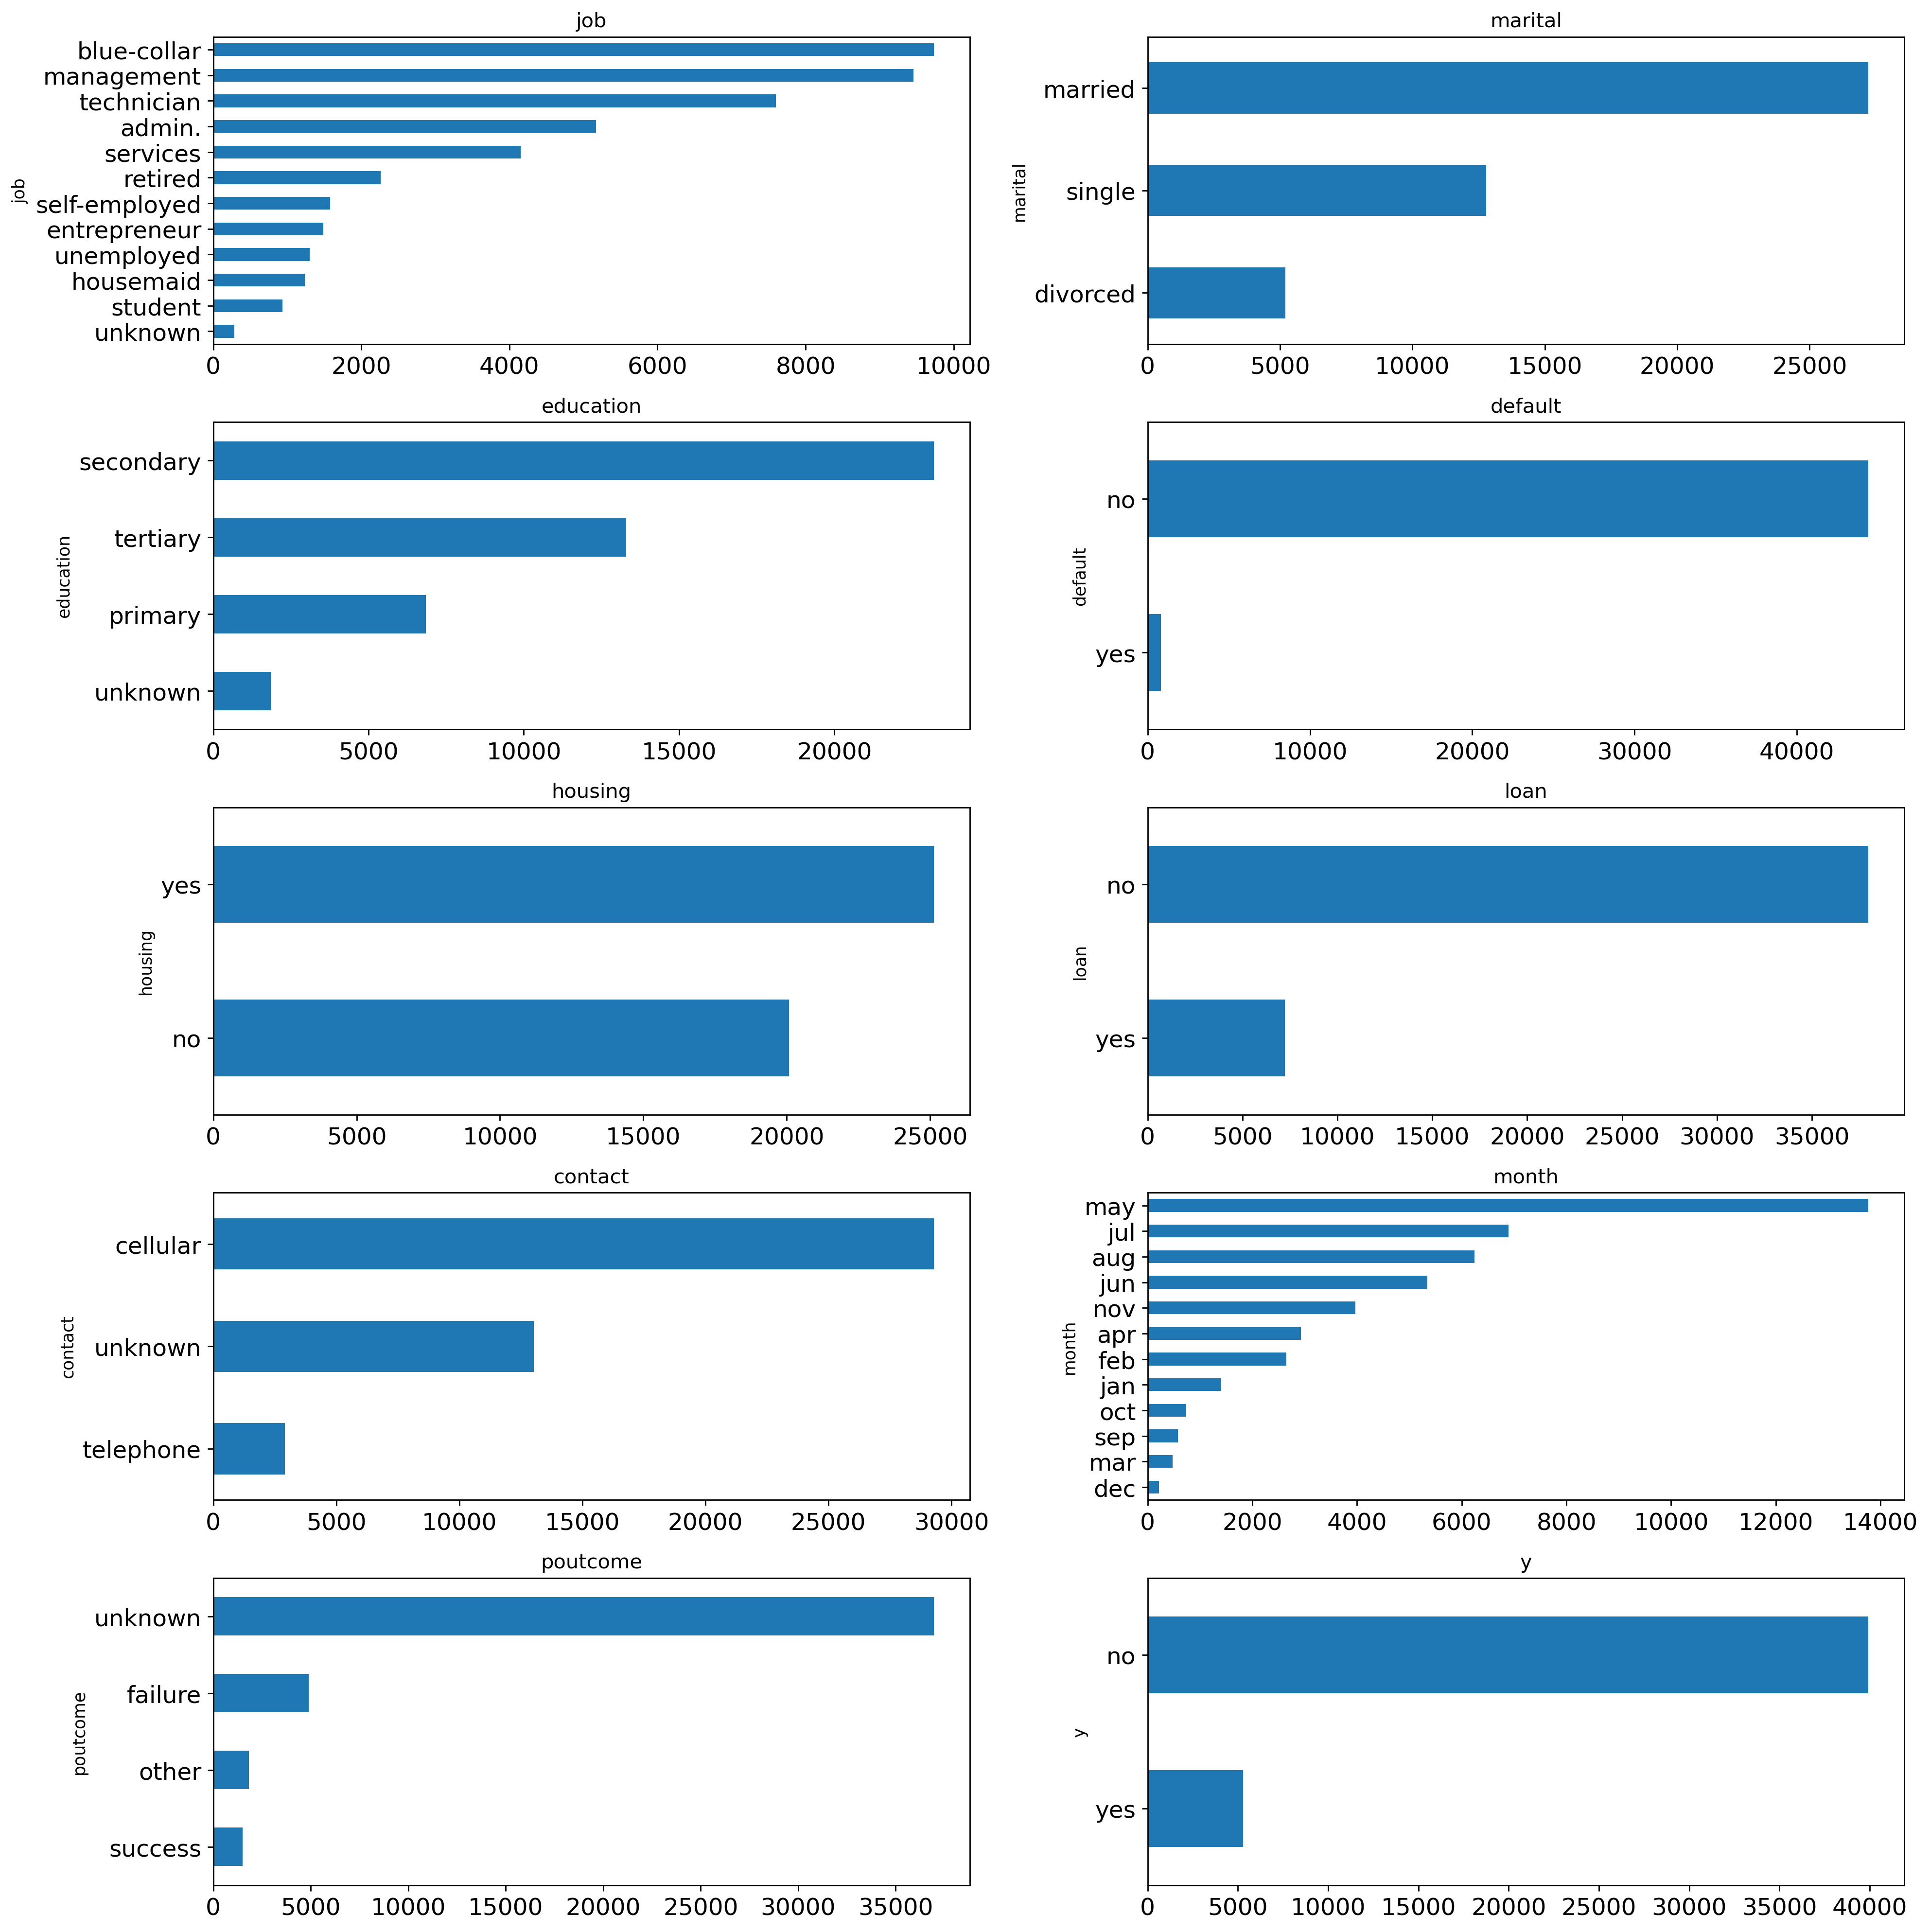

In [11]:
#Univariate Analysis of Categorical Features
#A way of looking at the counts of each of the categories is countplots. These are similar to barplots with the width of the bars representing the count of the category in the variable.

fig, axes = plt.subplots(5, 2, figsize=(16, 16)) #total 10 subplots that's why 5*2
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(df[discrete_feature]):
    _ = df[c].value_counts()[::-1].plot(kind = 'barh', ax=axes[i], title=c, fontsize=14)
    
_ = plt.tight_layout()

# Bivariate Analysis: Relationships of Categorical Features with Target

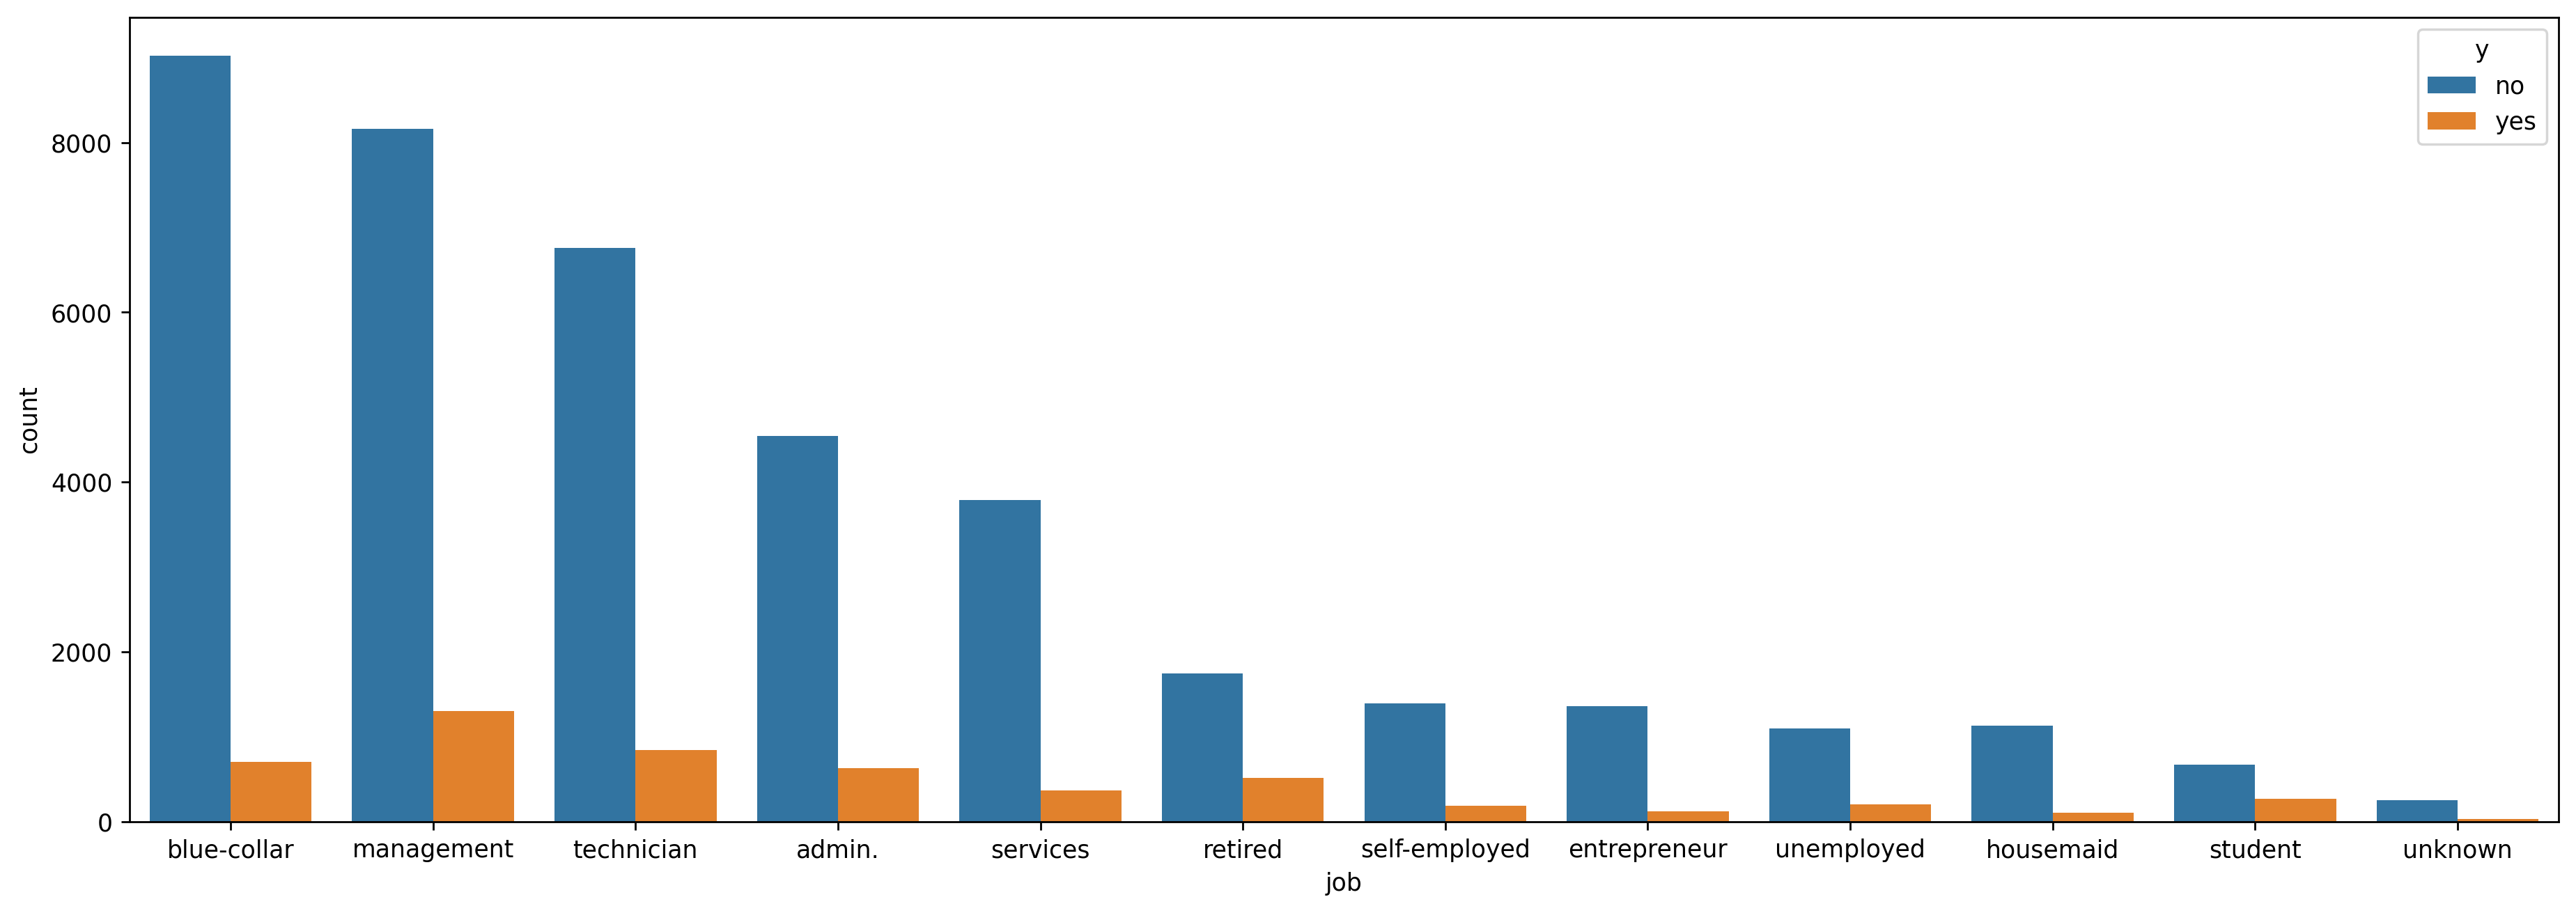

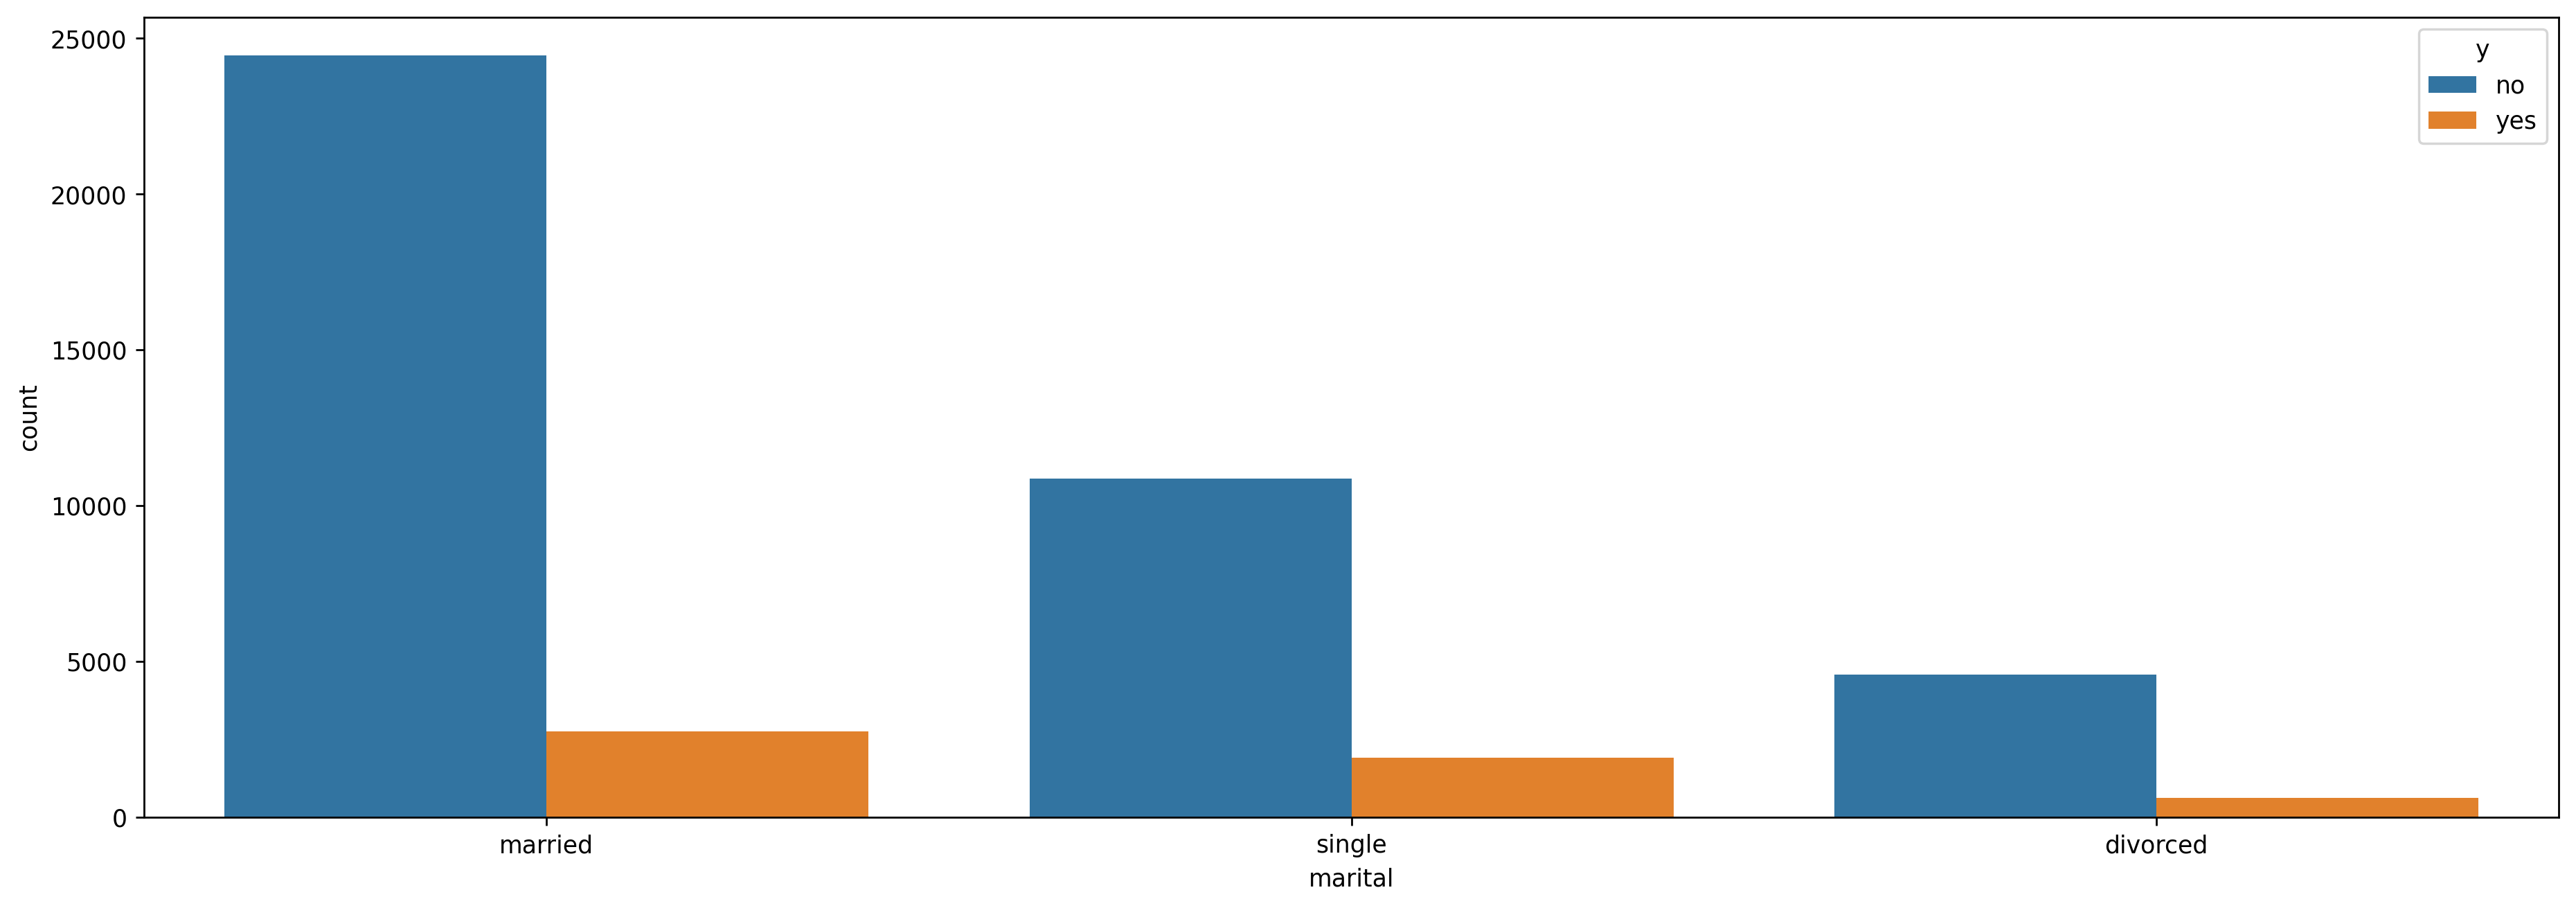

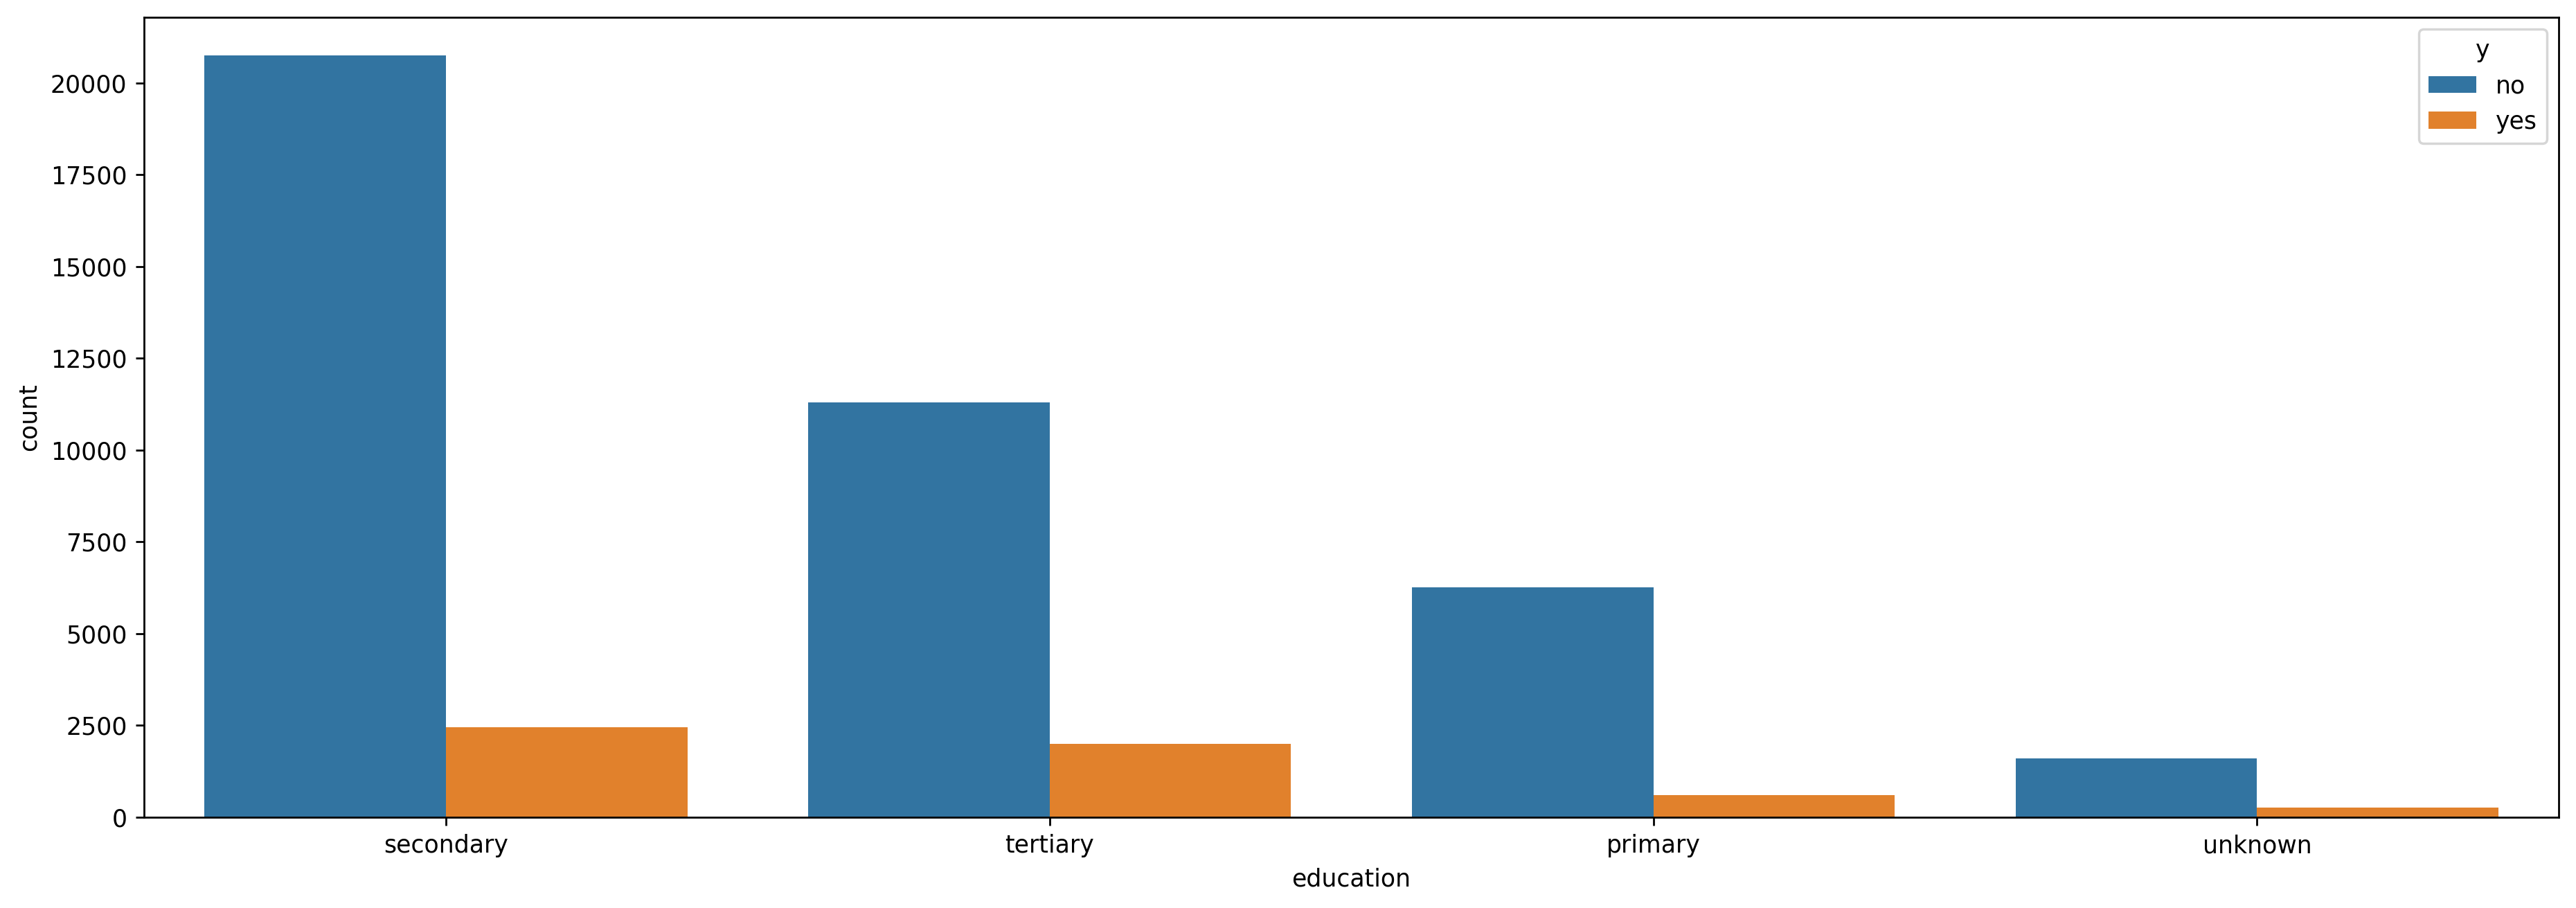

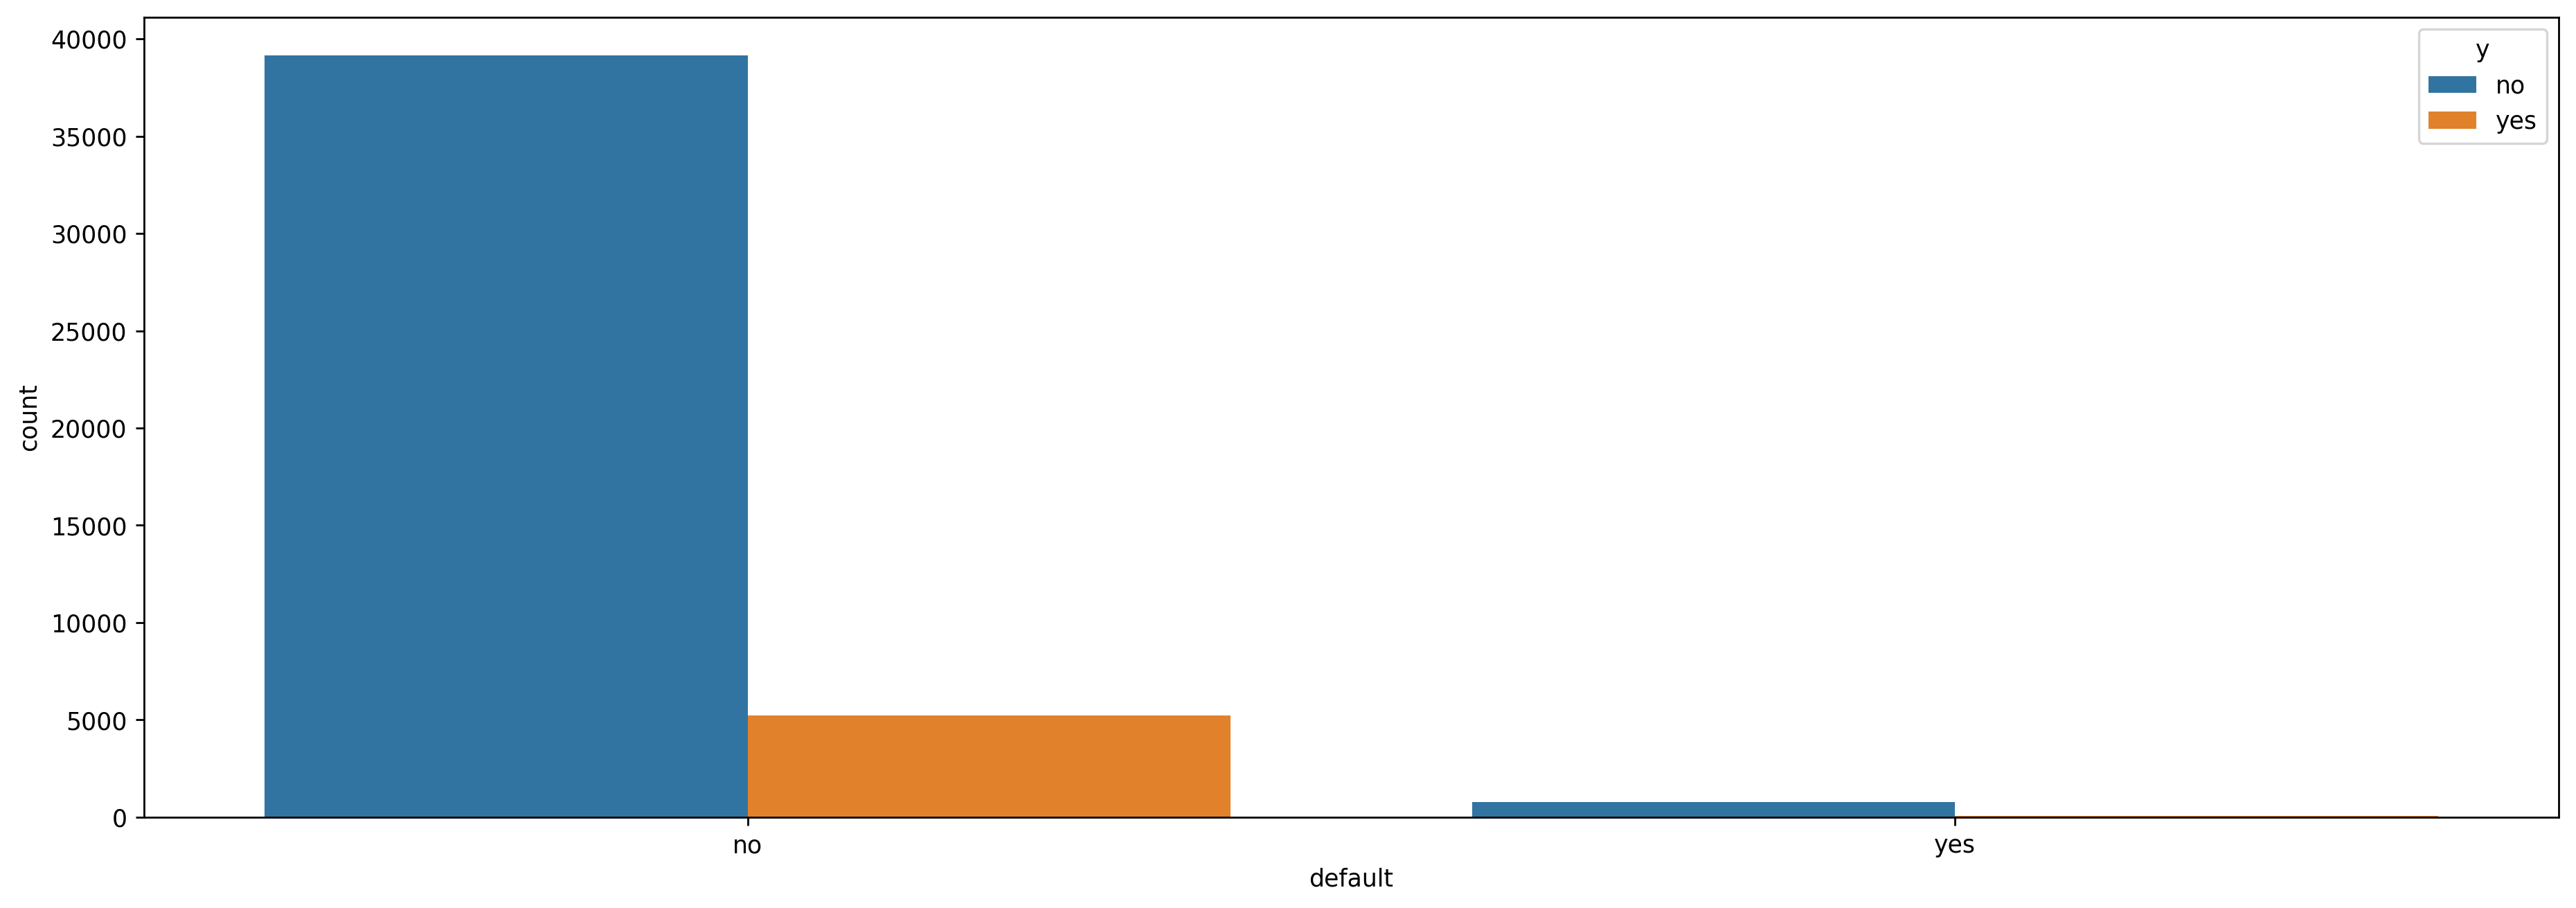

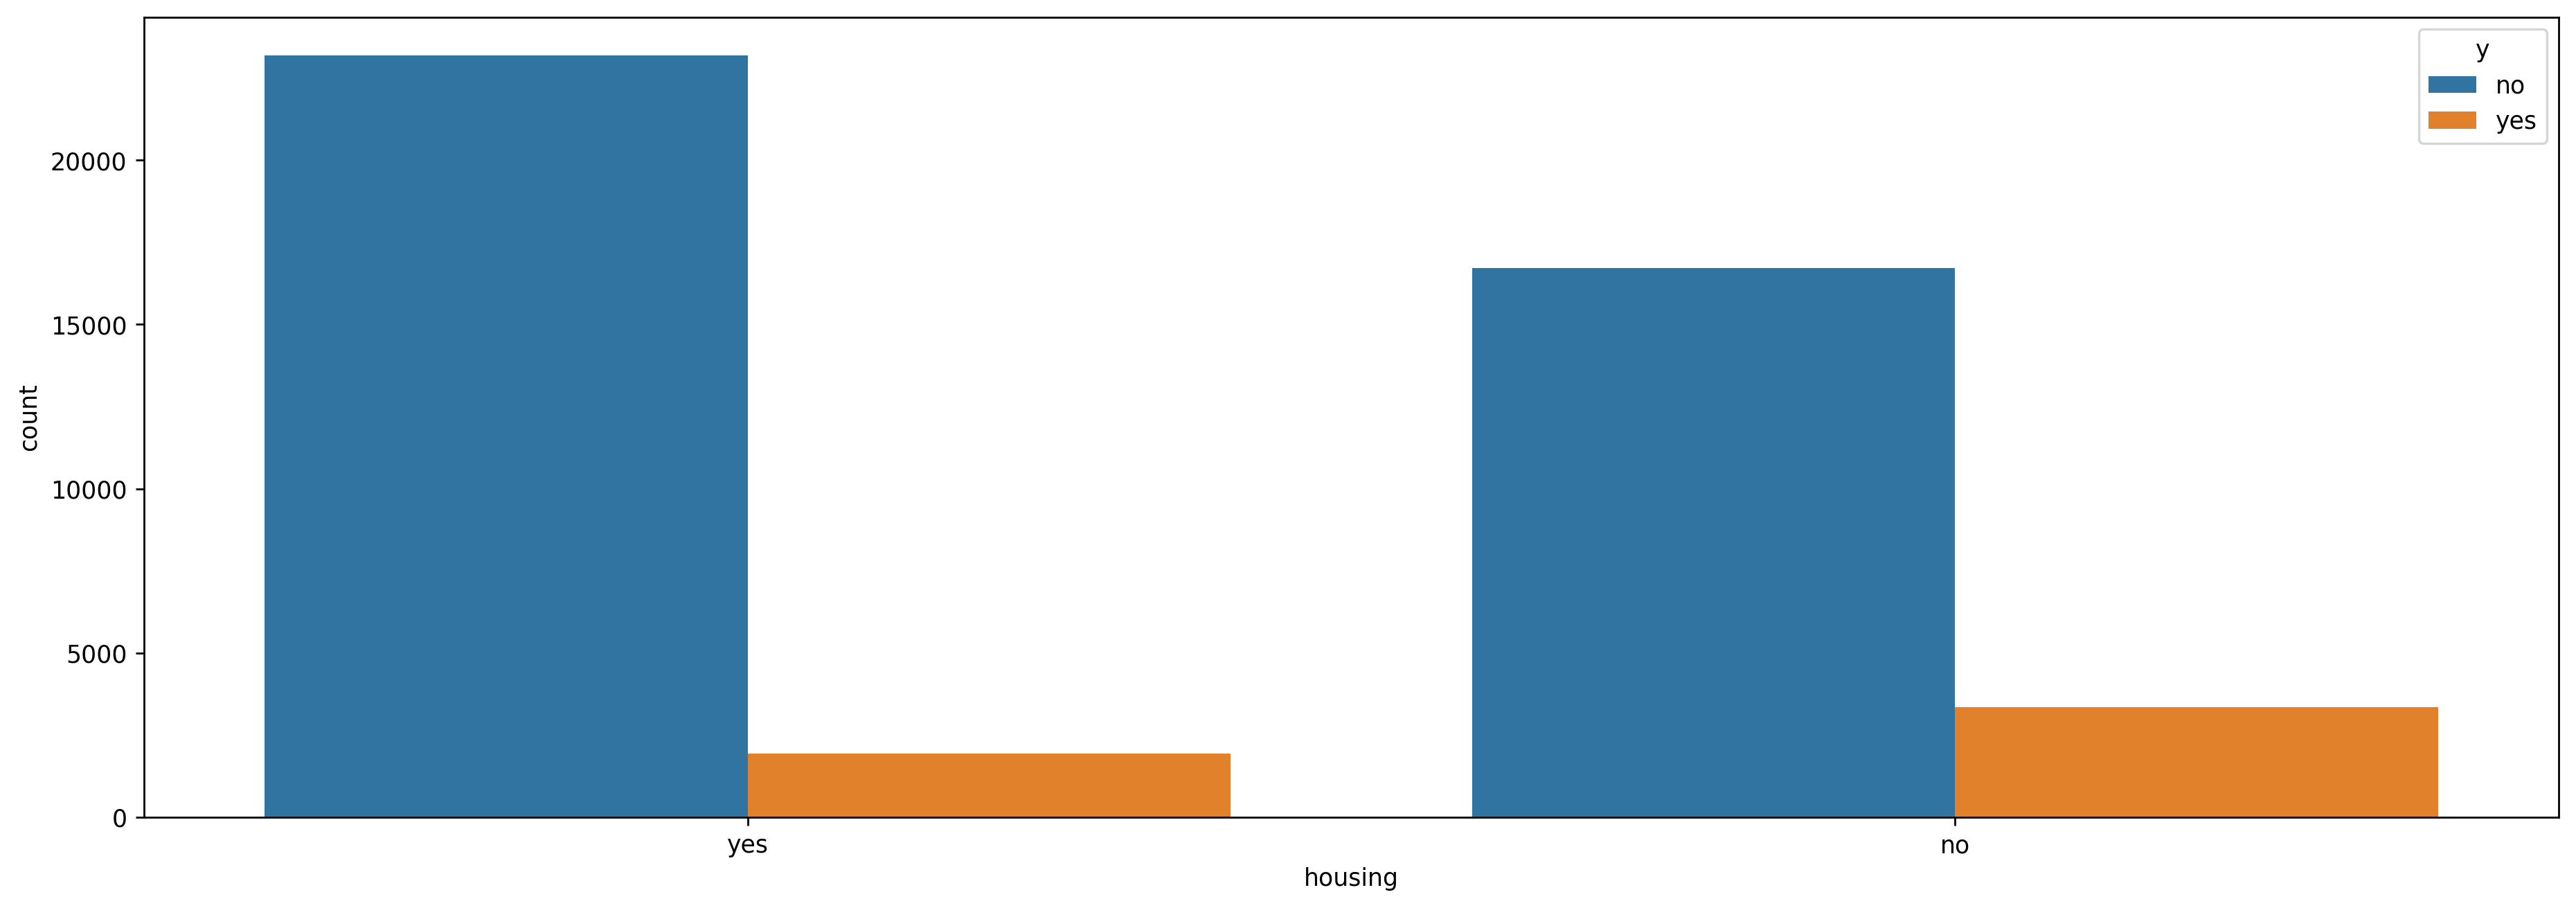

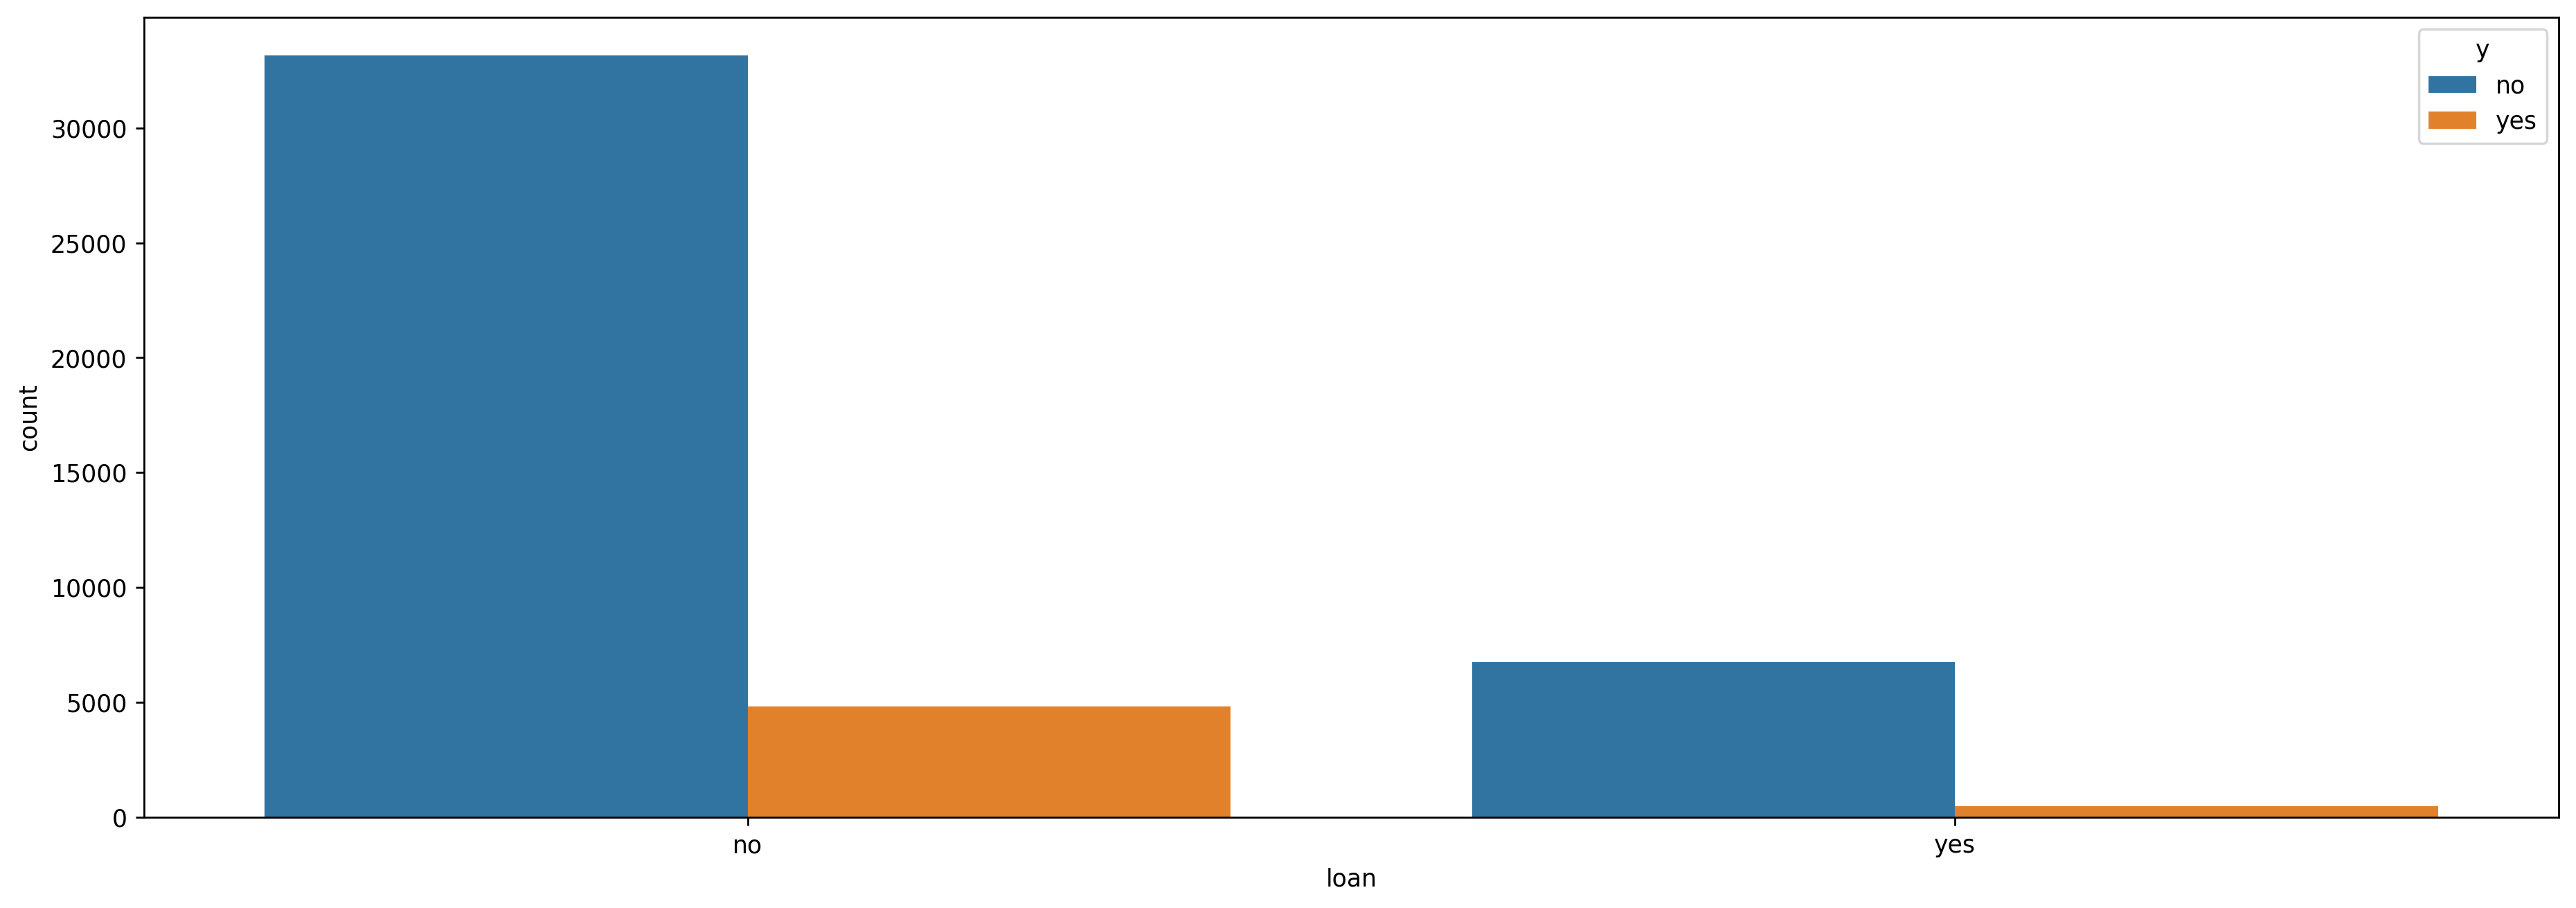

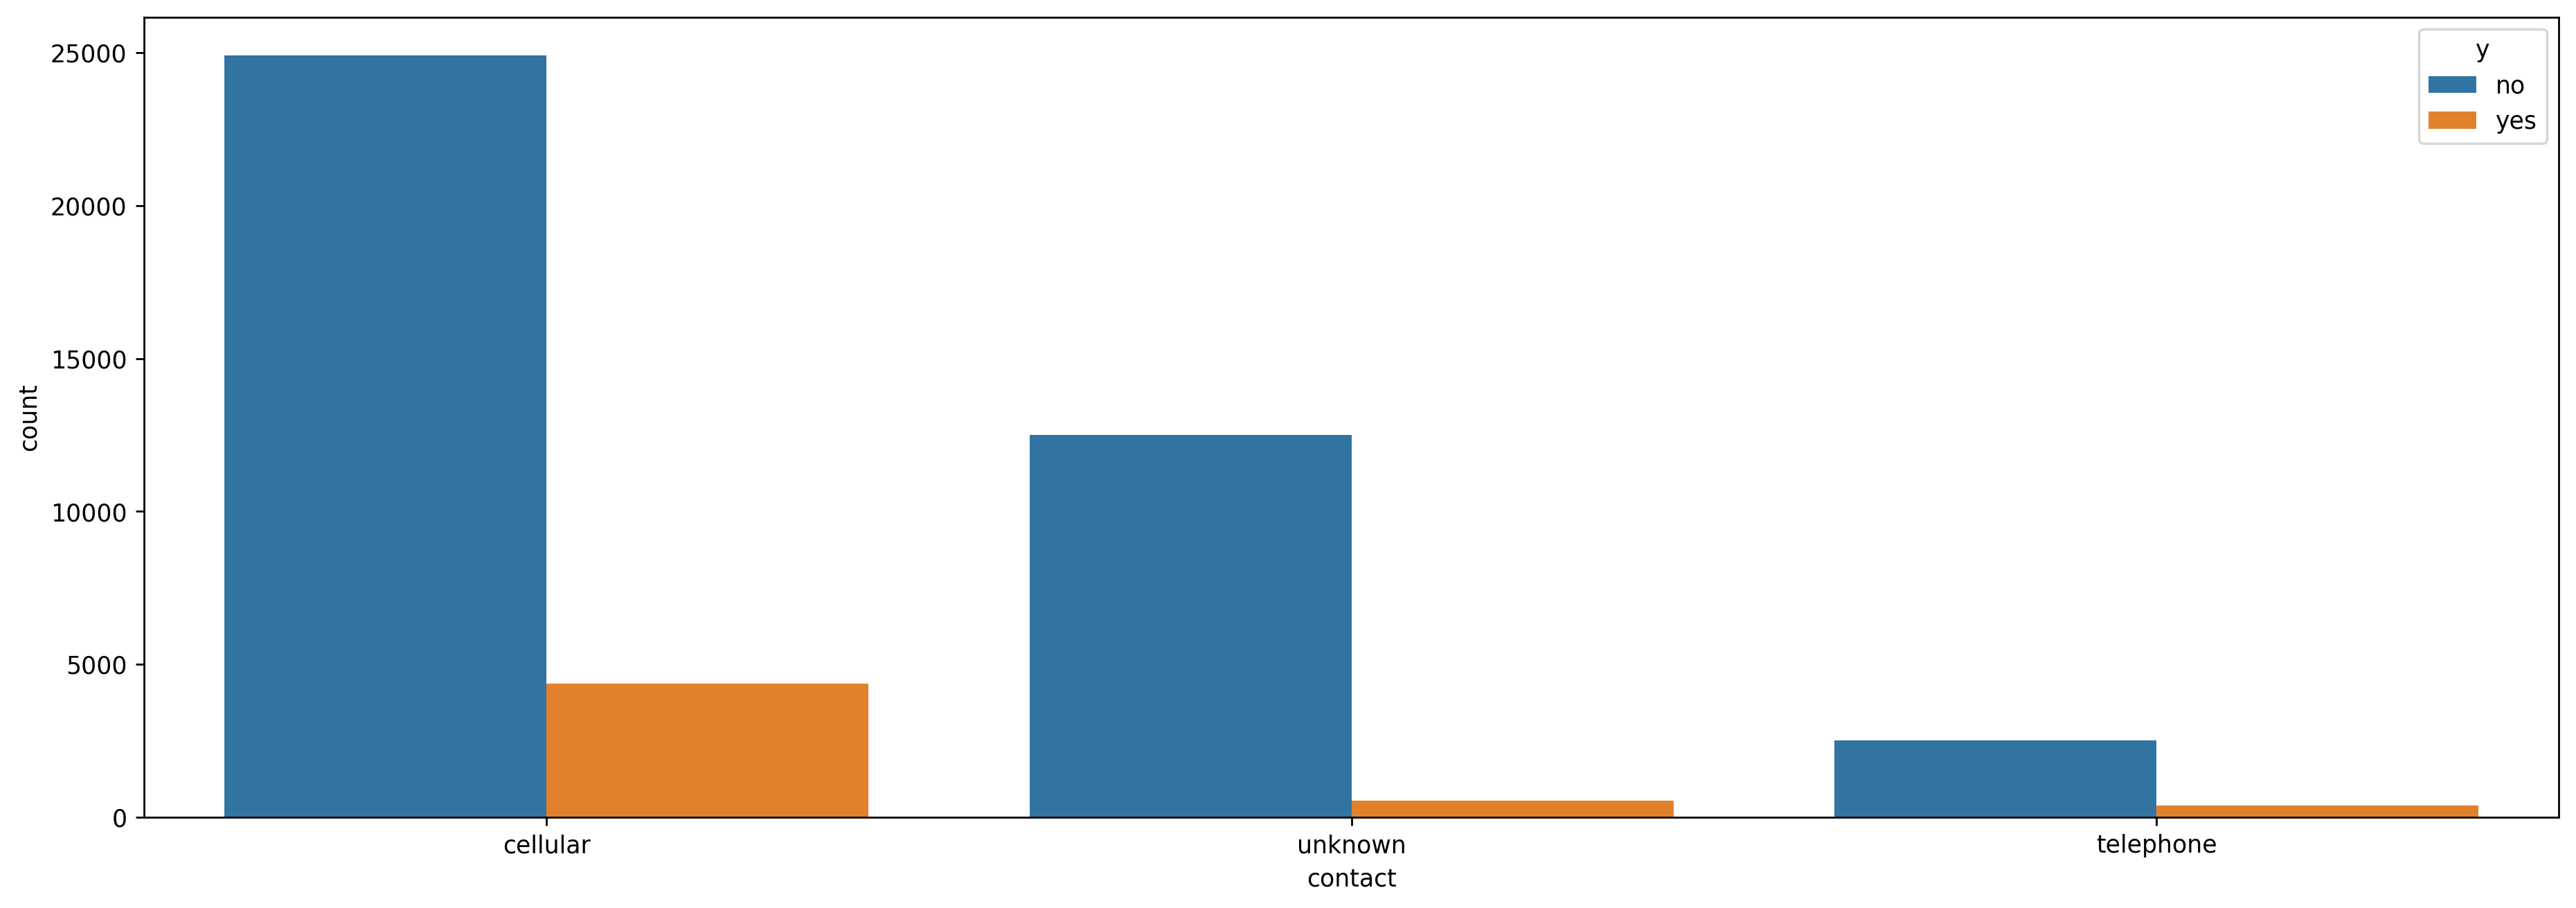

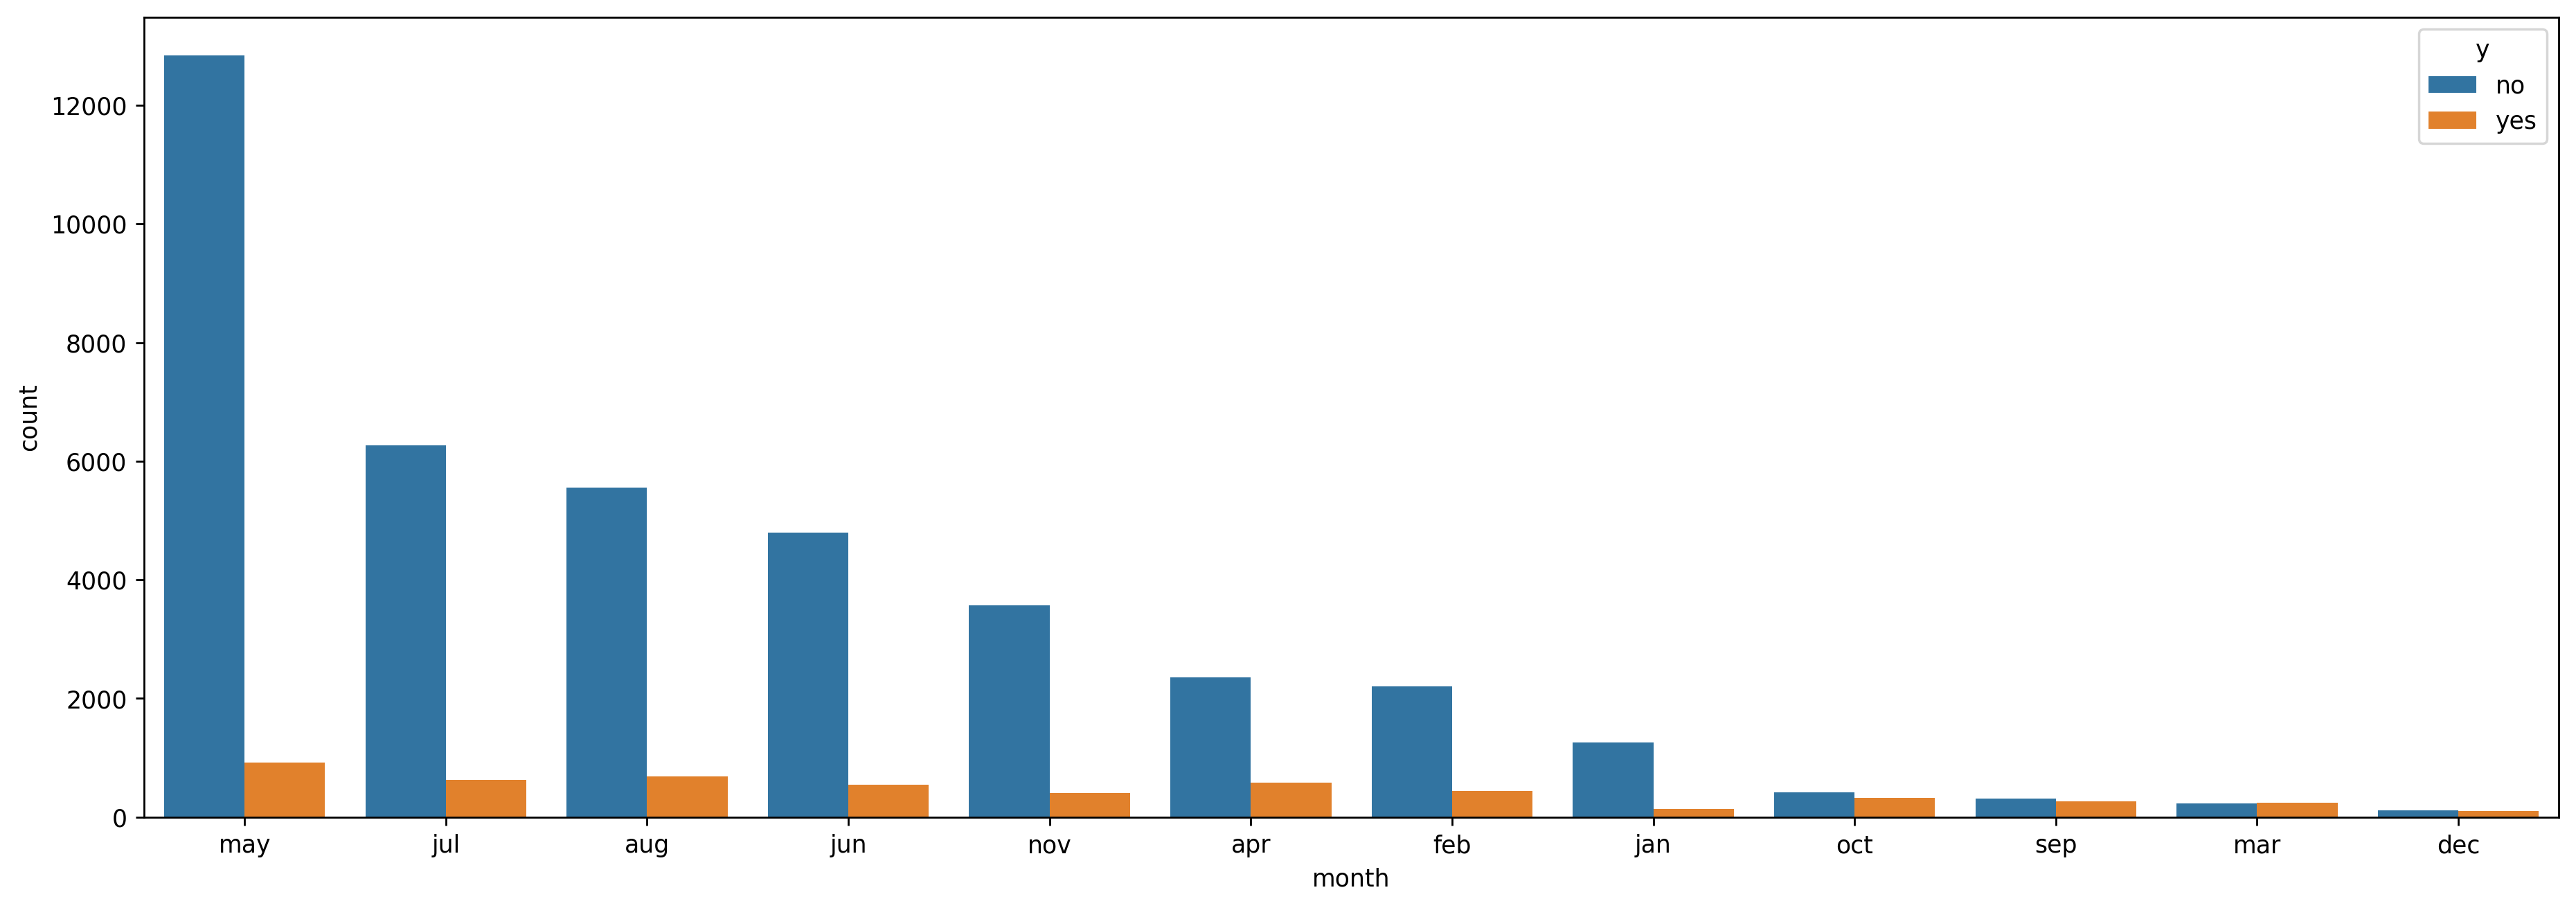

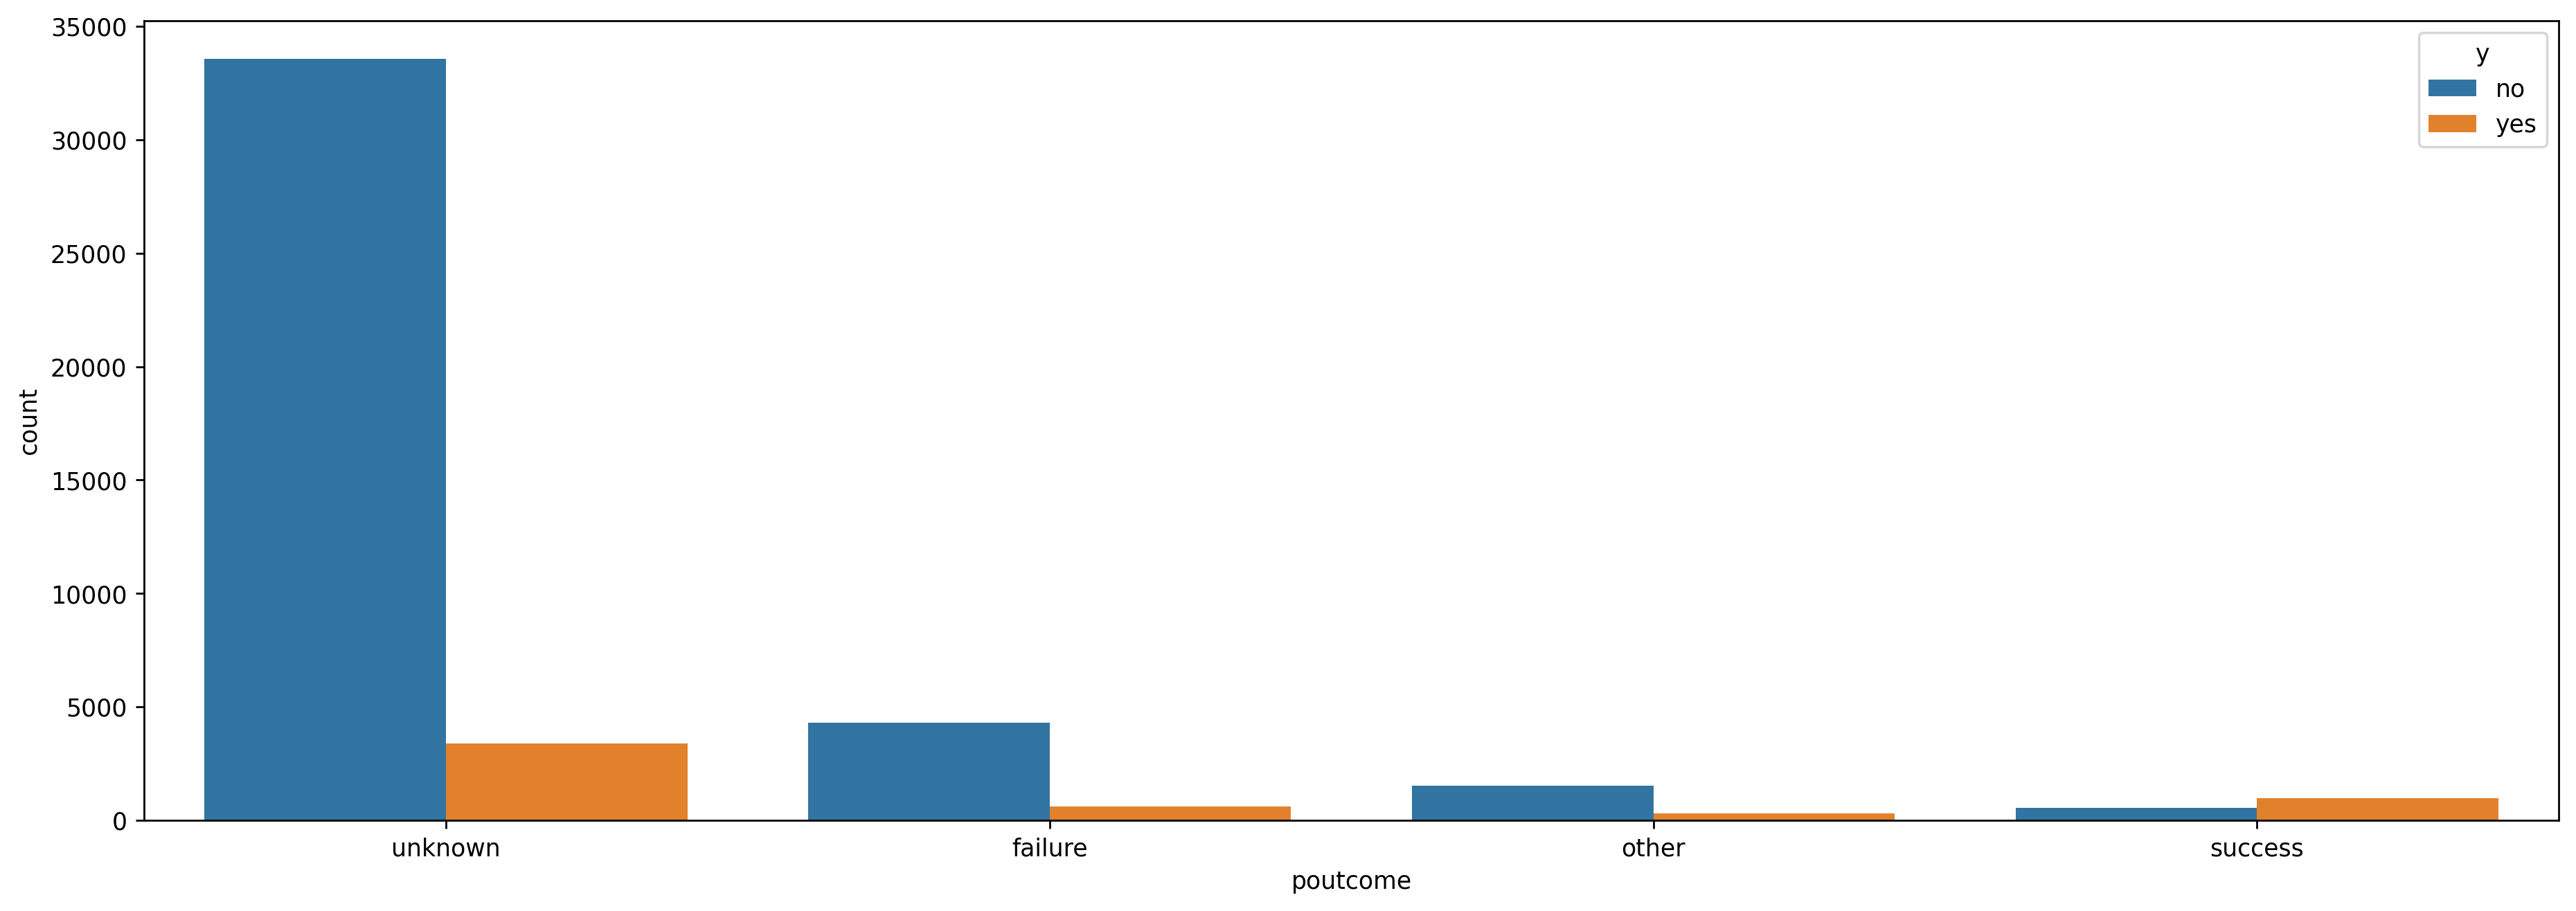

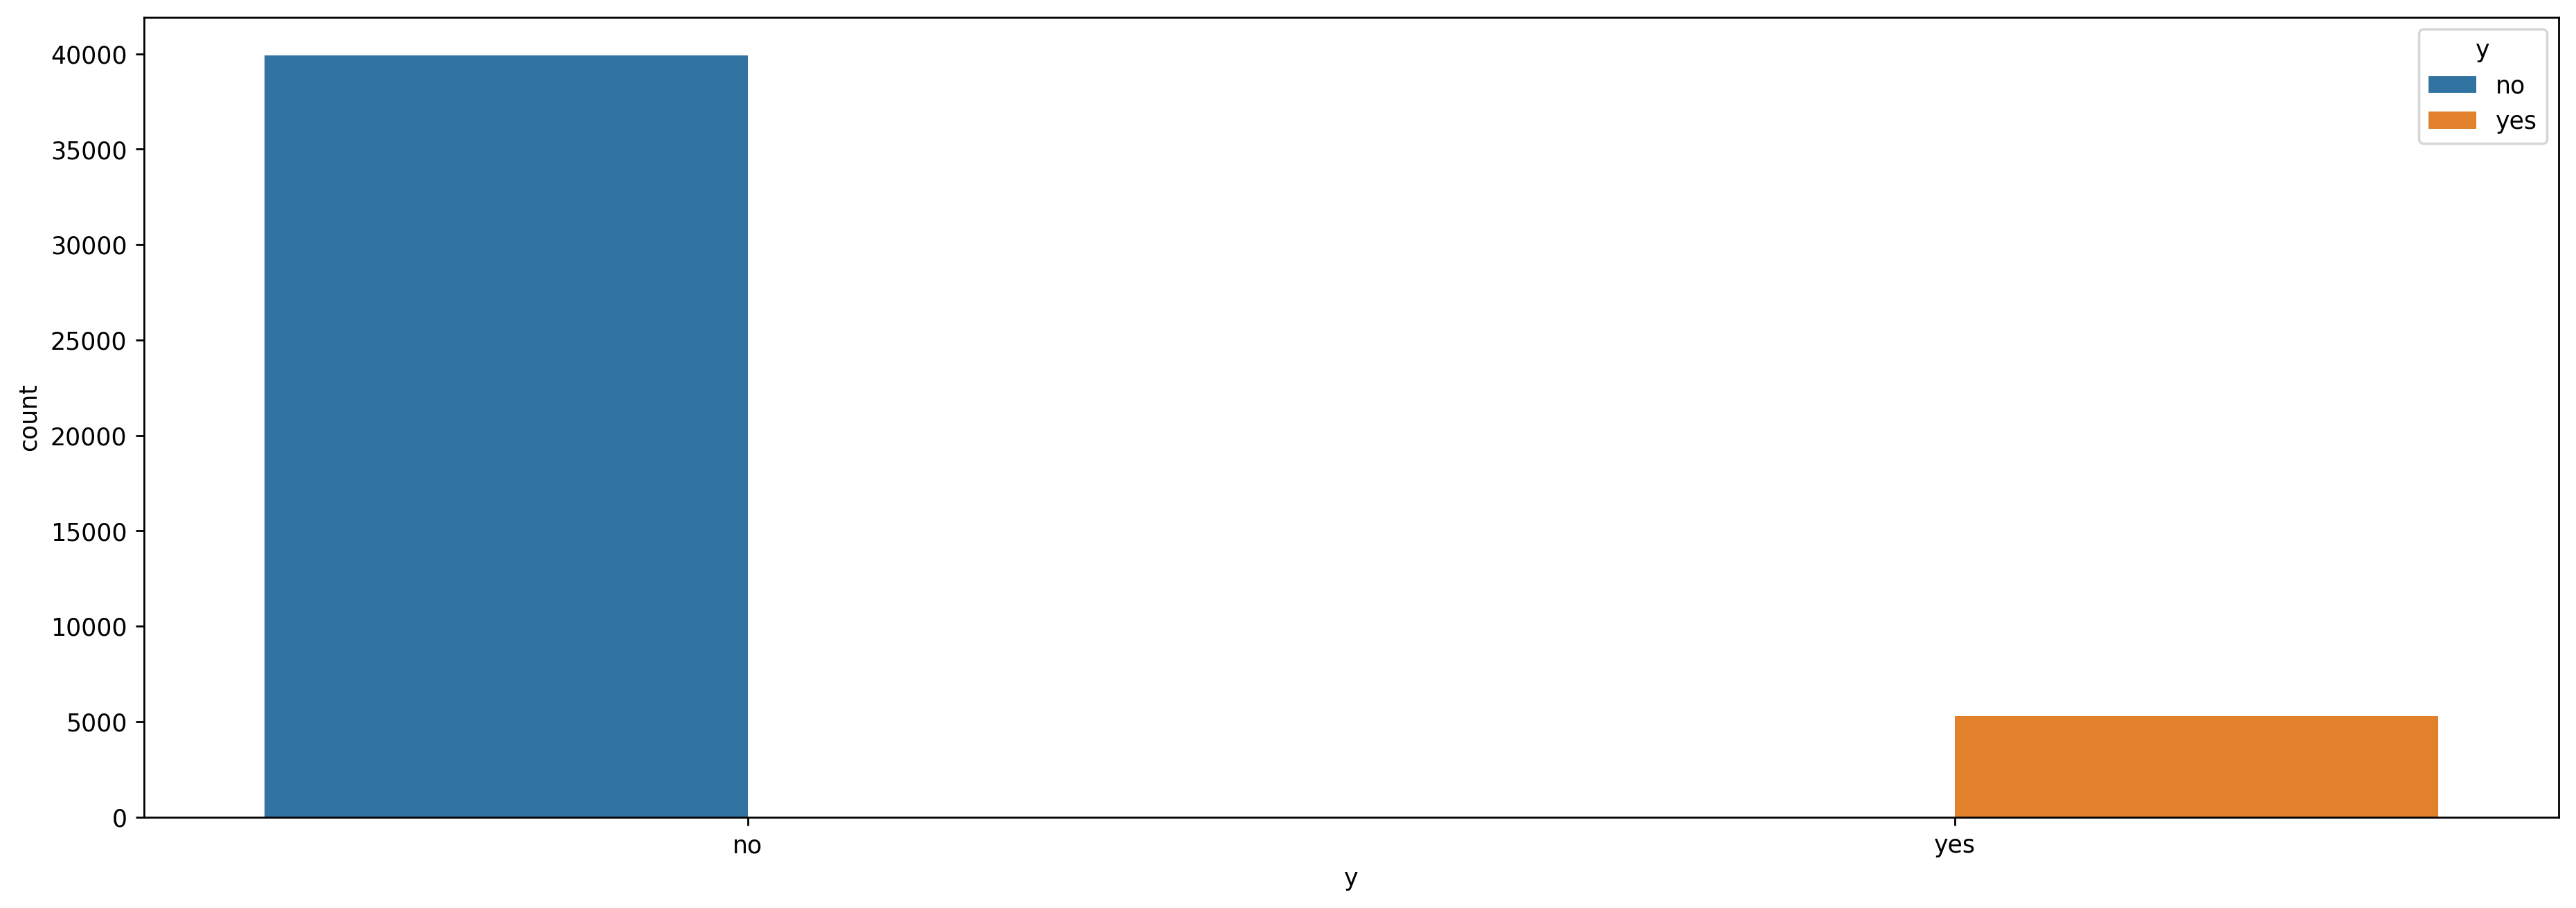

In [12]:
#Bivariate Analysis: Relationships of Categorical Features with Target
for c in discrete_feature:
    plt.figure(figsize=(18,6)) #this creates a new figure on which your plot will appear
    sns.countplot(x =c, hue='y',data = df,order = df[c].value_counts().index) #individual bars sorted acc to frequency and then plotted

In [13]:
data1= df.copy()
data1['y'] = data1['y'].replace(['no','yes'],[0,1]) #needed to do below mathematical operations
#data1.head()

#no of clients who subscribed to the term deposit grouped by occupation
total_subscribers = data1.groupby('job').y.sum().values

# Proportion of clients who subscribed to the term deposit grouped by occupation
proportion_subscribed = (round(data1.groupby('job').y.sum()/data1.groupby('job').y.count(),3)*100).values

# Total amount of clients per occupation
total_people = data1.groupby('job').y.count().values

#Form a dataframe and print
jobs = sorted(data1.job.unique()) #list of all jobs
jobs_with_subscribers = pd.DataFrame({'Job': jobs, 'Total Subscribers':total_subscribers,'Total People in Job': total_people,'Proportion of Subscribers': proportion_subscribed})
jobs_with_subscribers.sort_values(by='Proportion of Subscribers', ascending=False)

,Job,Total Subscribers,Total People in Job,Proportion of Subscribers
8,student,269,938,28.7
5,retired,516,2264,22.8
10,unemployed,202,1303,15.5
4,management,1301,9458,13.8
0,admin.,631,5171,12.2
6,self-employed,187,1579,11.8
11,unknown,34,288,11.8
9,technician,840,7597,11.1
7,services,369,4154,8.9
3,housemaid,109,1240,8.8


#### Also, from the ‘job’ vs target plot, we can see that though the absolute number of admin, blue collar, technician occupation subscribers are more, if we look proportionally (subscribers in that occupation / total people in that occupation), it seems that this number is not that impressive. Instead, according to proportion, students and retired people are much more likely to subscribe to the term deposits. We may see a very positive effect of the marketing campaign on these categories of people.

#### Similarly, even though bank have more clients who are married subscribers, If we look according to proportions, we see that single clients responded to the campaign better.

In [14]:
married_subscribers = data1[(data1.marital=='married') ].y.sum()
single_subscribers = data1[(data1.marital=='single') | (data1.marital=='divorced')].y.sum() #single or divorced

married_subscribers_prop = married_subscribers/len(data1[data1.marital=='married'])
single_subscribers_prop = single_subscribers/len(data1[(data1.marital=='single') | (data1.marital=='divorced')])

print('No of Married clients who subscribe: {}'.format(married_subscribers))
print('No of Single (and divorced) clients who subscribe : {}'.format(single_subscribers))

print('Married clients campaign success rate: {0:.0f}%'.format(married_subscribers_prop*100))
print('Single clients campaign success rate: {0:.0f}%'.format(single_subscribers_prop*100))

No of Married clients who subscribe: 2755
No of Single (and divorced) clients who subscribe : 2534
Married clients campaign success rate: 10%
Single clients campaign success rate: 14%


#### Contrary to what we expected, married people are less likely to subscribe than single people. Proportion of single subscribers is more by about 4%.

#### As we were expecting , people having personal loans subscribe less to the term deposits. But the same trend is not true for people with home loans.

#### Now, we want to find out: “Are younger customers more likely to subscribe to a term deposit compared to old customers ?”

# Age
sns.histplot(data = df['age'], kde = True, bins=20)
plt.tight_layout()
plt.show()

#### Majority of the customers are between the age 30 to 40, and very few customers are above age 60. Bank is primarily targets working class people. 

In [15]:
n1=len(df[(df['age'] > 60) & (df['y'] == 'yes')]) #number of old subscribers
n2=len(df[(df['age'] > 60) & (df['y'] == 'no')]) #number of old non-subscribers
n3=len(df[(df['age'] <= 60) & (df['y'] == 'yes')]) #number of young subscribers
n4=len(df[(df['age'] <= 60) & (df['y'] == 'no')]) #number of young non-subscribers

print(f'Proportion of young subscribers is: {n3/(n3+n4)} and the proportion of old subscribers is {n1/(n1+n2)}')

Proportion of young subscribers is: 0.10873861390636713 and the proportion of old subscribers is 0.4225589225589226


#### It looks like effect of marketing on old people is much more positive than the corresponding effect on young people. So, old people can be a major group bank would like to target!

# Part 2. Data Preprocessing and Feature Engineering

#### We can’t predict how long we gonna talk to the client (duration) and how many calls would we require to get the answer about deposit (campaign), so in order to have a more realistic prediction, we will drop these columns.

#### Also we saw that all the days have more or less similar distribution for both the classes. Thus we won’t be using it in predicting the target variable. We will dropped this feature too.

In [16]:
data= df.drop(['duration','campaign','day'],axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,may,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,may,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,may,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,may,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,may,-1,0,unknown,no


In [17]:
#Check for Null Values
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#### There are no null entries in the dataset

In [18]:
# Check for Duplicate Rows
df[df.duplicated()].shape

(0, 17)

#### There are no duplicate rows in the dataset

In [19]:
# use value_counts() to count occurrences of 'unknown'
for col_name in data.columns:
    try:
        print('column',col_name,'has',data[col_name].value_counts()['unknown'],'unknown entries')
    except:
        pass

column job has 288 unknown entries
column education has 1857 unknown entries
column contact has 13020 unknown entries
column poutcome has 36959 unknown entries


### Inference and result drown from the previous results.

1. There are unknown values for many variables in the Data set. There are many ways to handle missing data. One of the ways is to discard the row but that would lead to a reduction of data set and hence would not serve our purpose of building an accurate and realistic prediction model.

2. Another method is to smartly infer the value of the unknown variable from the other variables. This a way of doing an imputation where we use other independent variables to infer the value of the missing variable. This doesn’t guarantee that all missing values will be addressed but the majority of them will have a reason which can be useful in the prediction.

3. Variables with unknown values are: ‘job’, ‘education’, ‘contact’, ‘poutcome’. But the significant ones are ‘education’, ‘job’.

4. Therefore, we start with creating new variables for the unknown values in ‘education’, ‘job’. We do this to see if the values are missing at random or is there a pattern in the missing values.

### Data Imputation:
(here we try to data imputation in case of train data. But, not in case of test data)

* Now, to infer the missing values in ‘job’ and ‘education’, we make use of the cross-tabulation between ‘job’ and ‘education’. Our hypothesis here is that ‘job’ is influenced by the ‘education’ of a person. Hence, we can infer ‘job’ based on the education of the person. Moreover, since we are just filling the missing values, we are not much concerned about the causal inference. We, therefore, can use the job to predict education.

* As we see, if ‘age’ > 60, then the ‘job’ is ‘retired,’ which makes sense.

In [20]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job']='retired'
data.loc[(data['job']=='admin.') & (data['education']=='unknown'), 'education']='secondary'
data.loc[(data['job']=='blue-collar') & (data['education']=='unknown'), 'education']='secondary'
data.loc[(data['job']=='entrepreneur') & (data['education']=='unknown'), 'education']='tertiary'
data.loc[(data['job']=='housemaid') & (data['education']=='unknown'), 'education']='primary'
data.loc[(data['job']=='management') & (data['education']=='unknown'), 'education']='tertiary'
data.loc[(data['job']=='retired') & (data['education']=='unknown'), 'education']='secondary'
data.loc[(data['job']=='self-employed') & (data['education']=='unknown'), 'education']='tertiary'
data.loc[(data['job']=='services') & (data['education']=='unknown'), 'education']='secondary'
data.loc[(data['job']=='student') & (data['education']=='unknown'), 'education']='secondary'
data.loc[(data['job']=='technician') & (data['education']=='unknown'), 'education']='secondary'
data.loc[(data['job']=='unemployed') & (data['education']=='unknown'), 'education']='secondary'

In [21]:
pd.crosstab(data['job'],data['education'])

education,primary,secondary,tertiary,unknown
job,,,,
admin.,209,4390,572,0
blue-collar,3758,5825,149,0
entrepreneur,183,542,762,0
housemaid,672,395,173,0
management,294,1121,8043,0
retired,796,1119,371,0
self-employed,130,577,872,0
services,345,3607,202,0
student,44,671,223,0


#### Inferring jobs from education: If ‘education’ = ‘primary’ then the ‘job’ is usually ‘blue-collar’. If ‘education’ = ‘secondary’, then the ‘job’ = ‘technician’. If ‘education’ = ‘tertiary’, then the ‘job’ = ‘management’. 

In [22]:
data.loc[(data['education']=='primary') & (data['job']=='unknown'), 'job']='blue-collar'
data.loc[(data['education']=='secondary') & (data['job']=='unknown'), 'job']='technician'
data.loc[(data['education']=='tertiary') & (data['job']=='unknown'), 'job']='management'

In [23]:
pd.crosstab(data['education'],data['job'])

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
education,,,,,,,,,,,,
primary,209,3808,183,672,294,796,130,345,44,158,257,0
secondary,4390,5825,542,395,1121,1119,577,3607,671,5537,757,0
tertiary,572,149,762,173,8077,371,872,202,223,1968,289,0
unknown,0,0,0,0,0,0,0,0,0,0,0,116


In [24]:
print(((np.round(sum(data['contact']=='unknown')/len(data)*100,2))),'% entries in contact column are unknown')
print(((np.round(sum(data['poutcome']=='unknown')/len(data)*100))),'% entries in poutcome column are unknown')

28.8 % entries in contact column are unknown
82.0 % entries in poutcome column are unknown


#### Since contact type is not a seems very important feature and also 80% entries in poutcome are unknown, we will drop both the columns

In [25]:
data= data.drop(['contact','poutcome'],axis=1)
data.head()

,age,job,marital,education,default,balance,housing,loan,month,pdays,previous,y
0,58,management,married,tertiary,no,2143,yes,no,may,-1,0,no
1,44,technician,single,secondary,no,29,yes,no,may,-1,0,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,-1,0,no
3,47,blue-collar,married,secondary,no,1506,yes,no,may,-1,0,no
4,33,unknown,single,unknown,no,1,no,no,may,-1,0,no


#### As we can see most records have “pdays” as -1. This means most records indicate the particular person was not contacted before. Let’s convert this “pdays” column into a binary categorical column “has_contacted” with 2 values:

In [26]:
#Syntax:
#df[new_column]=np.where(condition, value if condition is true, value if condition is false)

data['has_contacted'] = np.where(data['pdays']!= -1, True, False)

data.drop(['pdays'],axis=1,inplace=True)

data.head()

,age,job,marital,education,default,balance,housing,loan,month,previous,y,has_contacted
0,58,management,married,tertiary,no,2143,yes,no,may,0,no,False
1,44,technician,single,secondary,no,29,yes,no,may,0,no,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,may,0,no,False
3,47,blue-collar,married,secondary,no,1506,yes,no,may,0,no,False
4,33,unknown,single,unknown,no,1,no,no,may,0,no,False


## Converting Categorical Data to Numeric Data:
We will perform One Hot Encoding on job, marital, education and month columns and Label Encoding on default, housing, loan columns

In [27]:
data['default']=data['default'].map({'yes':1, 'no':0})
data['housing']=data['housing'].map({'yes':1, 'no':0})
data['loan']=data['loan'].map({'yes':1, 'no':0})
data['y']=data['y'].map({'yes':1, 'no':0})

In [28]:
data= pd.get_dummies(data,columns=['job','marital','education','month'])
data.head()

,age,default,balance,housing,loan,previous,y,has_contacted,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,0,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [29]:
for col1 in data.columns:
    for col2 in data.columns:
        if(col1 != col2):
            if(data[col1].corr(data[col2]) == 1.0 or data[col1].corr(data[col2]) == -1.0):
                print(col1,',',col2)

job_unknown , education_unknown
education_unknown , job_unknown


#### education_unknown and job_unknown has correlation +1, so we will drop education_unknown column

In [30]:
data.drop(['education_unknown'],axis=1,inplace=True)

data.head()

,age,default,balance,housing,loan,previous,y,has_contacted,job_admin.,job_blue-collar,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44,0,29,1,0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,33,0,2,1,1,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,47,0,1506,1,0,0,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False
4,33,0,1,0,0,0,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False


# Part 3. Model Building

## MinMaxScaler

In [31]:
x1 = data.drop('y', axis=1)
y1 = data[['y']]

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scalar = MinMaxScaler(feature_range= (0,1))
scalar.fit(x1)
scaled_x = scalar.transform(x1)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.20,random_state=12)
print("Shape of X_train : ",x_train.shape)
print("Shape of X_test  : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (36168, 37)
Shape of X_test  :  (9043, 37)
Shape of y_train :  (36168, 1)
Shape of y_test  :  (9043, 1)


 ## Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
lg1 = LogisticRegression()
lg1.fit(x_train, y_train)
lg1.coef_

array([[-4.36006583e-03, -8.47361529e-02,  1.91578968e-05,
        -7.73651807e-01, -5.89789589e-01, -8.36123689e-03,
         1.15473639e+00, -7.54375333e-03, -3.91436952e-01,
        -1.46052852e-01, -1.54714372e-01, -1.21552943e-01,
         5.12228557e-01, -9.87703163e-02, -2.31428863e-01,
         1.55198415e-01, -2.18316596e-01, -7.89764829e-03,
        -1.43951160e-02, -1.52594458e-01, -4.76999516e-01,
        -9.50884663e-02, -3.65202680e-01, -2.93716623e-01,
        -5.13680217e-02,  3.11654765e-01, -5.34526579e-01,
         1.76572831e-01, -2.44732385e-02, -2.71646349e-01,
        -3.80809623e-01, -3.58741642e-01,  4.46146358e-01,
        -5.61739743e-01, -4.07913153e-01,  4.70198123e-01,
         4.10595809e-01]])

In [37]:
y_pred = lg1.predict(x_test)

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve, classification_report
confusion_matrix(y_test,y_pred) #Sequence -> tn, fp, fn, tp

array([[7933,   60],
       [ 994,   56]], dtype=int64)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      7993
           1       0.48      0.05      0.10      1050

    accuracy                           0.88      9043
   macro avg       0.69      0.52      0.52      9043
weighted avg       0.84      0.88      0.84      9043



## 7. Model Testing and Model Evaluation

In [41]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy score is: {accuracy}')
print(f'F1 score is: {f1}')

Accuracy score is: 0.8834457591507243
F1 score is: 0.09605488850771872


AUC score : 72.88%


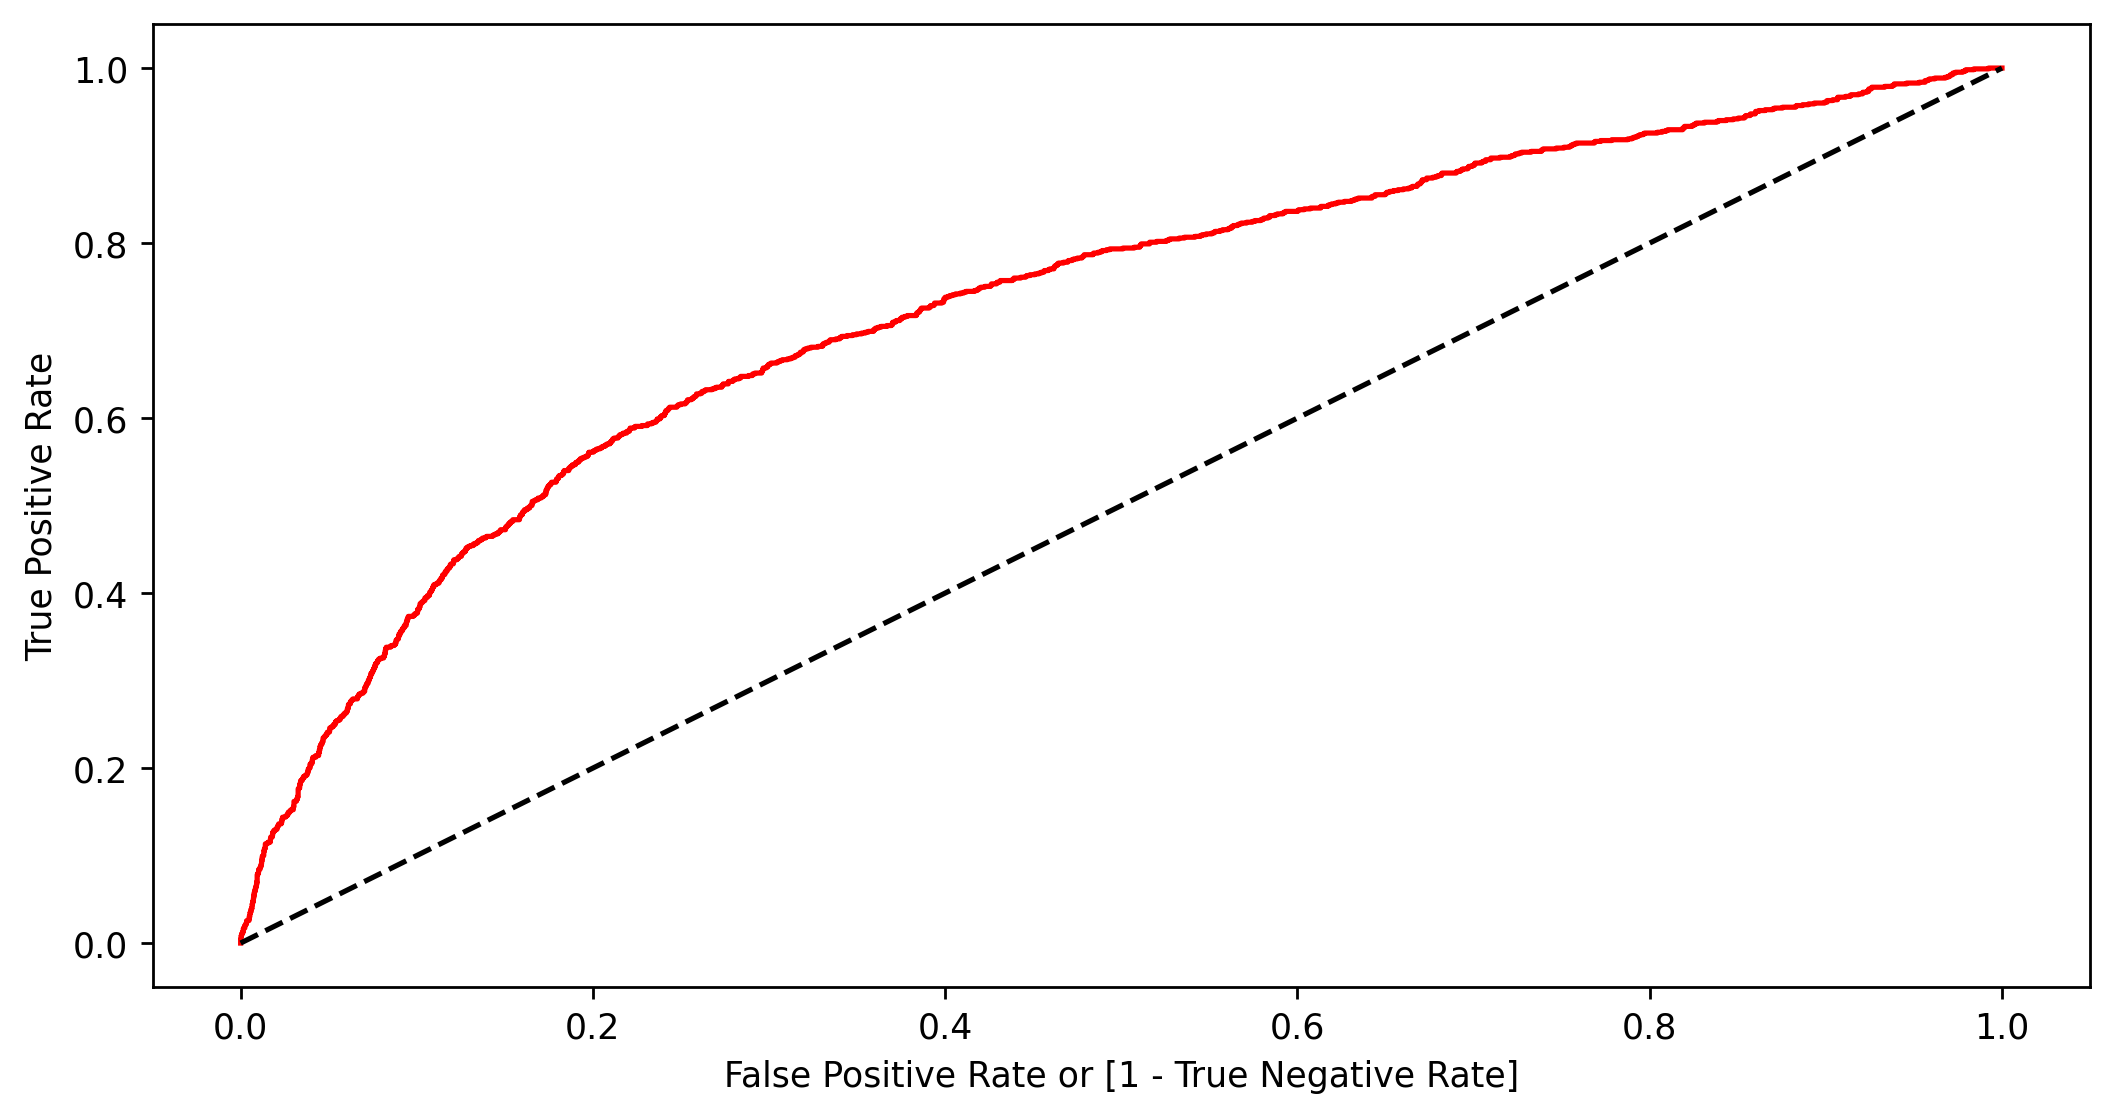

In [42]:
fpr, tpr, thresholds = roc_curve(y_test,lg1.predict_proba (x_test)[:,1])

auc = roc_auc_score(y_test,lg1.predict_proba (x_test)[:,1])
print('AUC score : {:.2f}%'.format(auc*100))

plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()